In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import DBSCAN

In [2]:
"""(power)
(energy)
(avgval)
(varience)
(first_derivate)
(dominantfreq)
(freqrange)"""

'(power)\n(energy)\n(avgval)\n(varience)\n(first_derivate)\n(dominantfreq)\n(freqrange)'

# for correlation ACC

In [3]:
data = np.load("feature_acc.npy")
acc_withEnv = np.load("feature_acc_envelope.npy")
acc_TSI = np.load("TSI.npy")
emg_withoutEnv = np.load("feature_emg.npy")
emg_withEnv = np.load("feature_emg_envelope.npy")

print(acc_withEnv.shape)
print(acc_withEnv[0].shape)
print(acc_withEnv[0][0].shape)
print(len(acc_withEnv[0][0][0]))
acc_TSI = np.expand_dims(acc_TSI, axis=-1)
print(acc_TSI.shape)
print(emg_withEnv.shape)
print(emg_withoutEnv.shape)

(9, 3, 7)
(3, 7)
(7,)
75
(9, 3, 1)
(9, 3, 7)
(9, 3, 9)


In [4]:
print(len(data))#10
print(len(data[0]))#3
print(len(data[0][0]))#5
print(len(data[0][0][6]))#75
print((data[0][0][0][0]))

9
3
7
75
0.01136813088279161


In [6]:
acc_withoutEnv = np.concatenate((data, acc_withEnv, acc_TSI, emg_withEnv, emg_withoutEnv), axis=2)
print(acc_withoutEnv.shape)

(9, 3, 31)


In [7]:
print(len(acc_withoutEnv))#10
print(len(acc_withoutEnv[0]))#3
print(len(acc_withoutEnv[0][0]))#5
print(len(acc_withoutEnv[0][0][6]))#75
print((acc_withoutEnv[0][0][0][0]))

9
3
31
75
0.01136813088279161


In [8]:
def AllPersonAllaxis(acc_withoutEnv):
    
    variable = acc_withoutEnv
    fet=[]
    final=[]
    #chek = np.zeros(shape=((variable.shape[0]),len(variable[0])))
    #print(chek.shape)
    #print(variable.shape)
    for i,data in enumerate(variable):
        data=np.moveaxis(data, -1, 0)#instances x axis x features
        #print(data.shape)
        for j in data:#axis x features
            #print(j.shape)
            for k in j:#each features
                fet.append(k)
    final.append(np.array(fet))
    fet=[]
    print(np.array(final).shape)
    print(np.array(final[0]).shape)
        #chek[i]=np.array(data)
    
    return final[0]
neu = AllPersonAllaxis(acc_withoutEnv)

(1, 837)
(837,)


In [9]:
#print(neu.shape)
print(len(neu))#10
print(len(neu[0]))#3
#print(len(neu[0][0]))#5
#print(len(neu[0][0][6]))#75

837
75


In [10]:
# IMPORTING and copying into array
variable = acc_withoutEnv[0][0]
chek = np.zeros(shape=((variable.shape[0]),len(variable[0])))
print(chek.shape)
for i,data in enumerate(variable):
    chek[i]=np.array(data)

(31, 75)


In [11]:
#If there is any value thats not coppied (CHECKED)
"""for i in chek:
    for a,j in enumerate(i):
        if int(j) == 0:
            print(j)
            print(a)
    print("HELLLO")"""

'for i in chek:\n    for a,j in enumerate(i):\n        if int(j) == 0:\n            print(j)\n            print(a)\n    print("HELLLO")'

D:\Anaconda3\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


(75, 31)
          0         1         2         3         4         5         6   \
0   1.000000  1.000000 -0.012385  0.200480 -0.017440  0.241119  0.361304   
1   1.000000  1.000000 -0.012385  0.200480 -0.017440  0.241119  0.361304   
2  -0.012385 -0.012385  1.000000 -0.041258 -0.265831  0.009086 -0.067953   
3   0.200480  0.200480 -0.041258  1.000000  0.021833  0.183524  0.700868   
4  -0.017440 -0.017440 -0.265831  0.021833  1.000000  0.054650  0.073494   
5   0.241119  0.241119  0.009086  0.183524  0.054650  1.000000  0.113942   
6   0.361304  0.361304 -0.067953  0.700868  0.073494  0.113942  1.000000   
7   1.000000  1.000000 -0.012373  0.200504 -0.017437  0.241122  0.361326   
8   1.000000  1.000000 -0.012373  0.200504 -0.017437  0.241122  0.361326   
9   0.381780  0.381780 -0.040340  0.958557  0.012074  0.249113  0.795996   
10  0.099029  0.099029  0.165628  0.205392 -0.032593  0.025472  0.308851   
11 -0.044034 -0.044034 -0.076822 -0.084676  0.036169 -0.025020 -0.035427   
12 

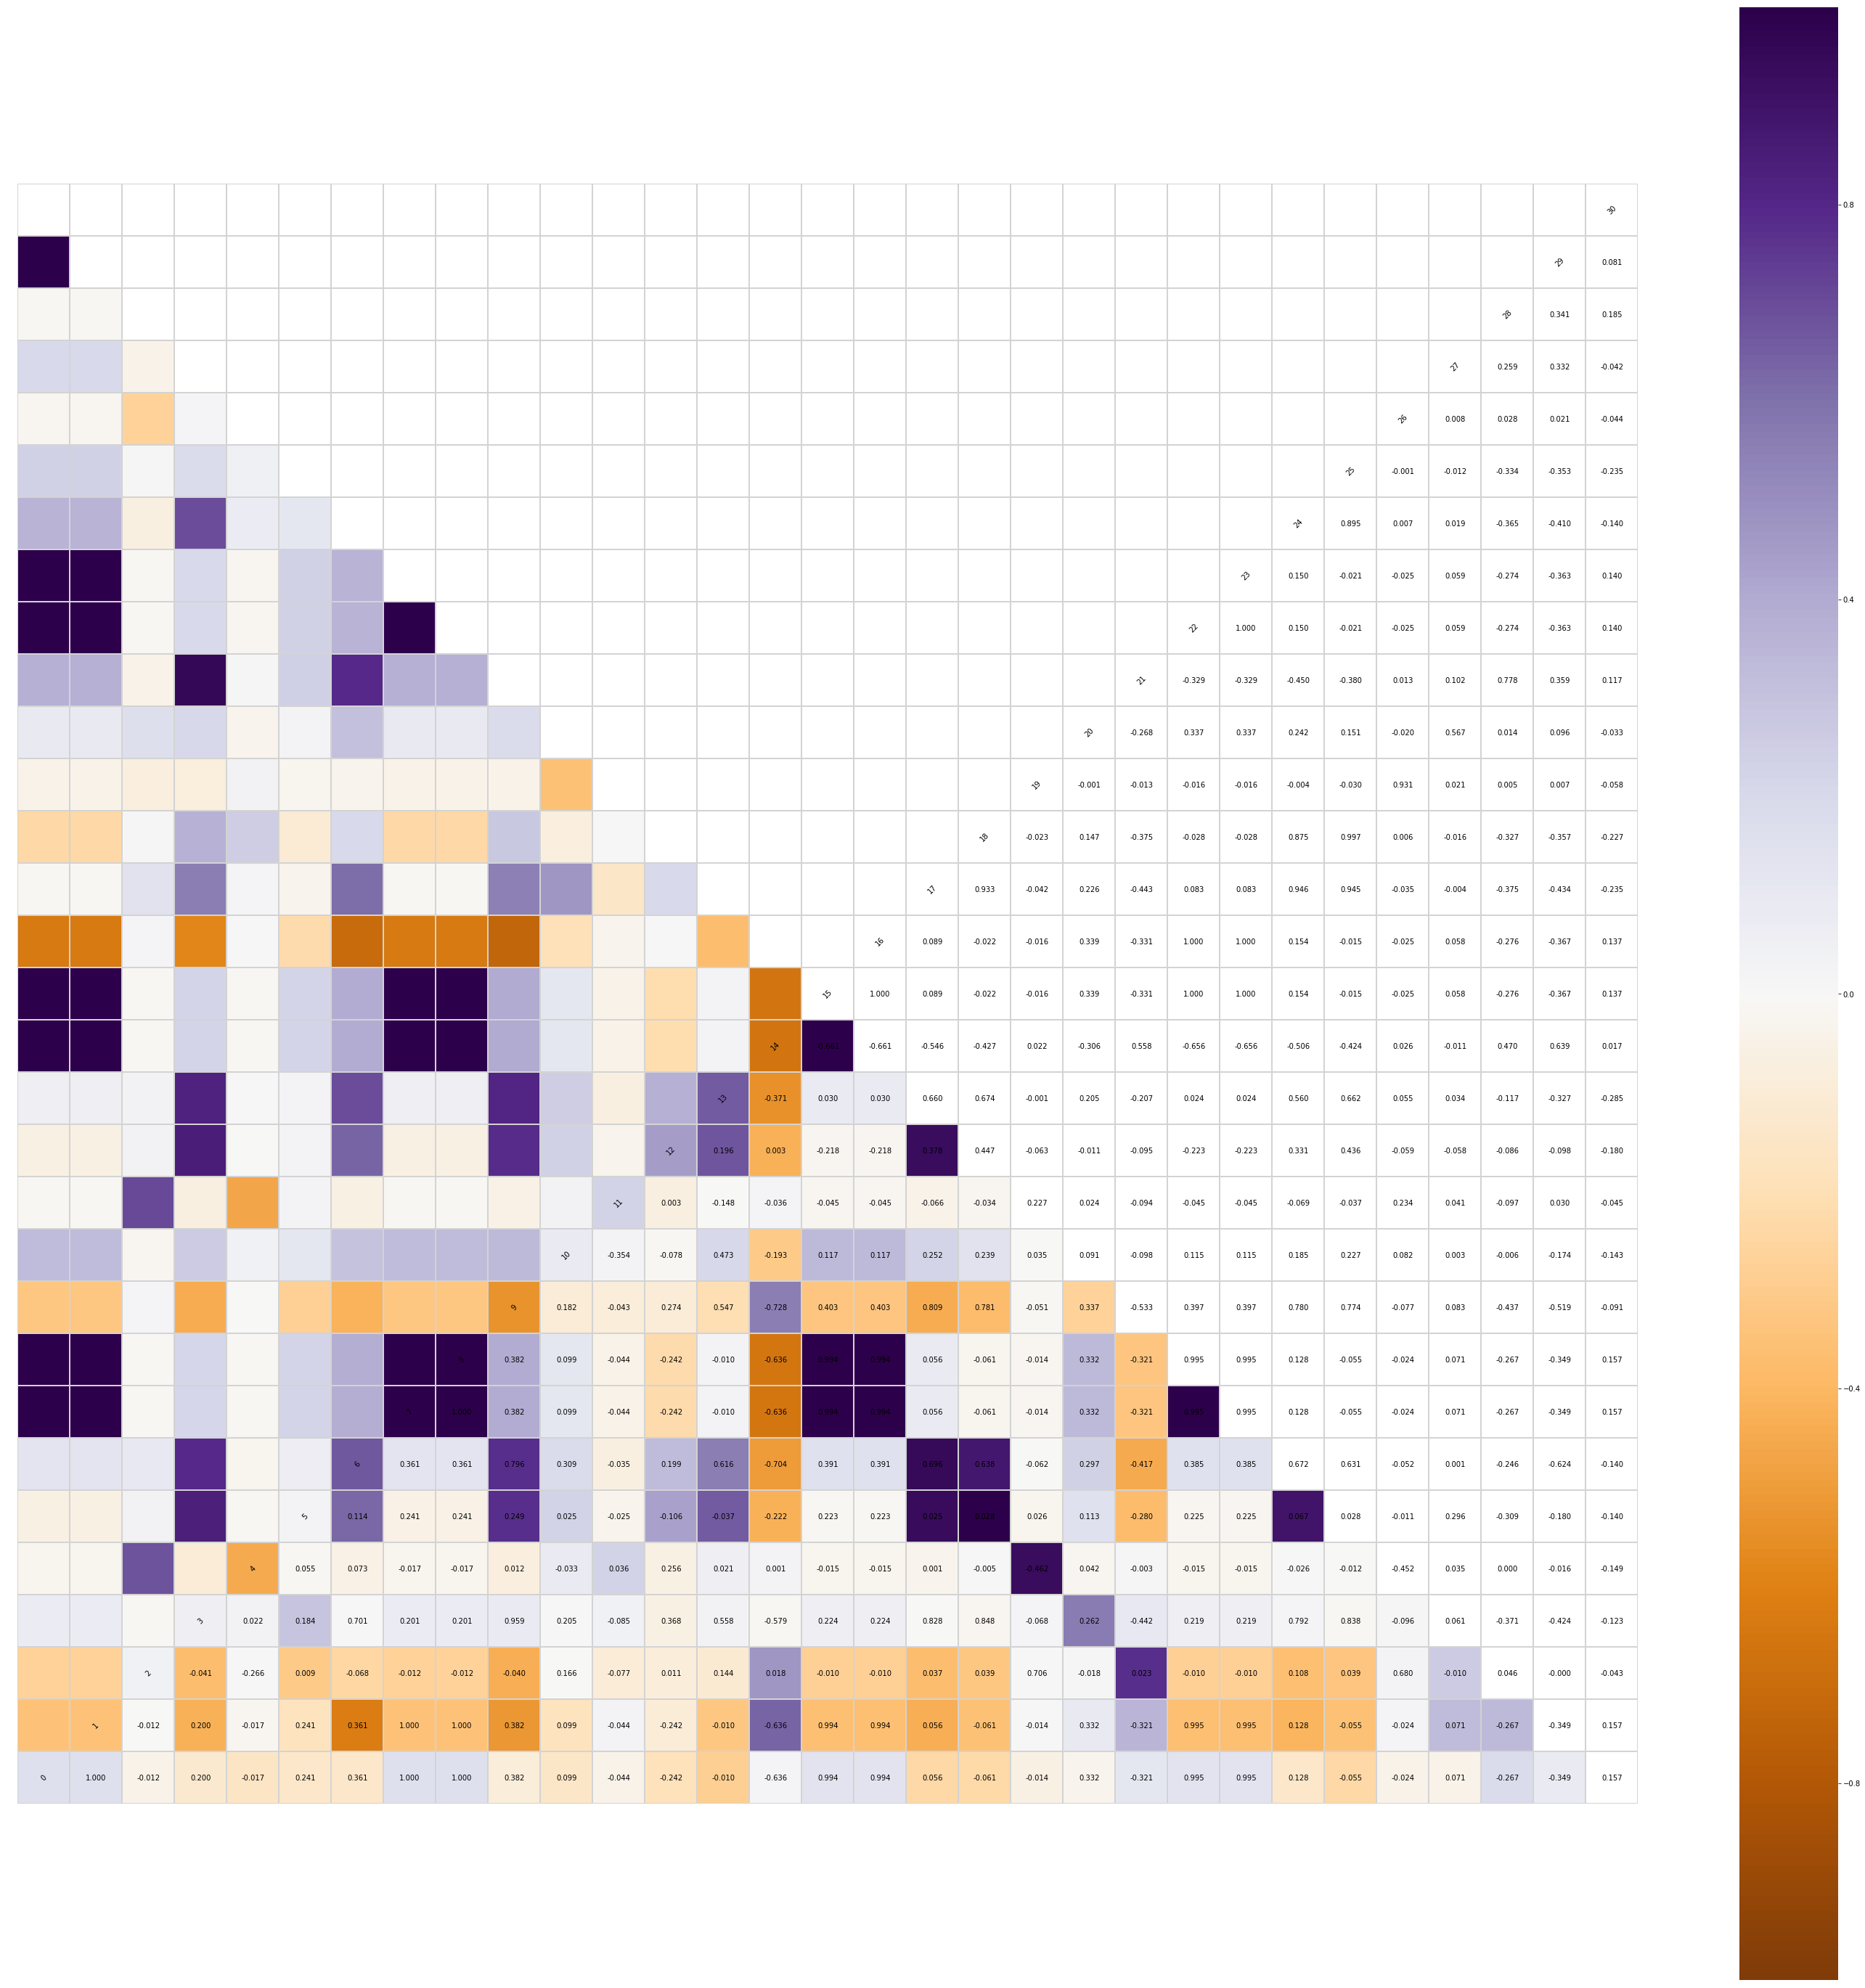

(31, 75)


In [12]:
rcParams['figure.figsize'] = 50,50
import seaborn.apionly as sns
chek = np.moveaxis(chek, 0, -1)
print(chek.shape)
# Using dataset
cols = [s*7 for s in list("ABCDEFG")]
df = pd.DataFrame(chek)#pd.DataFrame(data=np.random.rayleigh(scale=5, size=(100, 4)), columns=cols)

# Compute the correlation matrix
corr = df.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()
chek = np.moveaxis(chek, 0, -1)
print(chek.shape)

In [8]:
"""#testing moveaxis doesn't change values (CHECKED)
print(chek.shape)
print(chek[0,:])
jugad = np.moveaxis(chek,-1,0)
print(jugad.shape)
a= []
for i in jugad:
    for j in i:
        a.append(j)
        break
print(len(a))
print(a)
if a == list(chek[0,:]):
    print("VLAI")"""

'#testing moveaxis doesn\'t change values (CHECKED)\nprint(chek.shape)\nprint(chek[0,:])\njugad = np.moveaxis(chek,-1,0)\nprint(jugad.shape)\na= []\nfor i in jugad:\n    for j in i:\n        a.append(j)\n        break\nprint(len(a))\nprint(a)\nif a == list(chek[0,:]):\n    print("VLAI")'

In [13]:
#Adding results in all +ve numbers (CHECKED)
print(chek.shape)
minimum = chek.min(axis=1)
print(minimum)
mimim=abs(np.array([minimum,]*chek.shape[1]).transpose())
chek += mimim

(31, 75)
[ 1.13681309e-02  1.13681309e+02 -2.27811537e-02  4.35603443e-05
 -8.94852921e-04  3.40000000e+00  0.00000000e+00  2.27670236e-02
  2.27670236e+02  7.61848564e-03  2.78606335e-05 -3.61830829e-04
  2.00000000e+00  0.00000000e+00  9.47164909e-04  6.04654624e-12
  6.04654624e-08  7.86174454e-07  6.92020746e-14 -6.19275643e-09
  2.00000000e+00  2.00000000e-01  3.01603176e-12  3.01603176e-08
  4.01821986e-07  4.94379996e-14 -4.04090390e-09  2.00000000e+00
  2.00000000e-01  1.40000000e+01  2.00000000e-01]


In [14]:
#Checking for -ve values (CHECKED)
if np.any(chek<0):
    print("HERE we go again")
#checking for NAN values
array_sum = np.sum(chek)
array_has_nan = np.isnan(array_sum)
if array_has_nan.any():
    print("NaN value detected")

In [15]:
#Normalizing the values
total=np.sum(chek,axis=1)#total.shape = (features, )
total_array=np.array([total,]*chek.shape[1]).transpose()
print(total_array.shape)

#Checking for 0 value (CHECKED)
if np.any(total_array==0.0):
    print("It contains 0 values which is not suitable for division")
else:
    norm_matrix = chek/total_array

(31, 75)


In [16]:
#CHECKING THE NORMALIZATION SUM AND NEGATIVE VALUES
print(norm_matrix.shape)
for i in range(norm_matrix.shape[0]):
    print(np.sum(norm_matrix[i,:]))
if np.any(norm_matrix<0):
    print("HERE we go again")
#checking for NAN values
array_sum = np.sum(norm_matrix)
array_has_nan = np.isnan(array_sum)
if array_has_nan.any():
    print("NaN value detected")

(31, 75)
0.9999999999999999
0.9999999999999998
0.9999999999999999
1.0000000000000002
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0


In [17]:
#Normalization of random -ve valued decimal arrray (CHECKED OLD METHOD)
"""x_array = np.array([[.2,.3,-.5],[-.6,.300,-.40]])
minimum = x_array.min(axis=1)
print(minimum)
#print(x_array.shape[1])
mimim=abs(np.array([minimum,]*x_array.shape[1]).transpose())
print(mimim)
print(x_array+mimim)
#normalized_arr = preprocessing.normalize(x_array)
normalized_arr = preprocessing.normalize(x_array+mimim)
print(normalized_arr)"""

'x_array = np.array([[.2,.3,-.5],[-.6,.300,-.40]])\nminimum = x_array.min(axis=1)\nprint(minimum)\n#print(x_array.shape[1])\nmimim=abs(np.array([minimum,]*x_array.shape[1]).transpose())\nprint(mimim)\nprint(x_array+mimim)\n#normalized_arr = preprocessing.normalize(x_array)\nnormalized_arr = preprocessing.normalize(x_array+mimim)\nprint(normalized_arr)'

(75, 31)


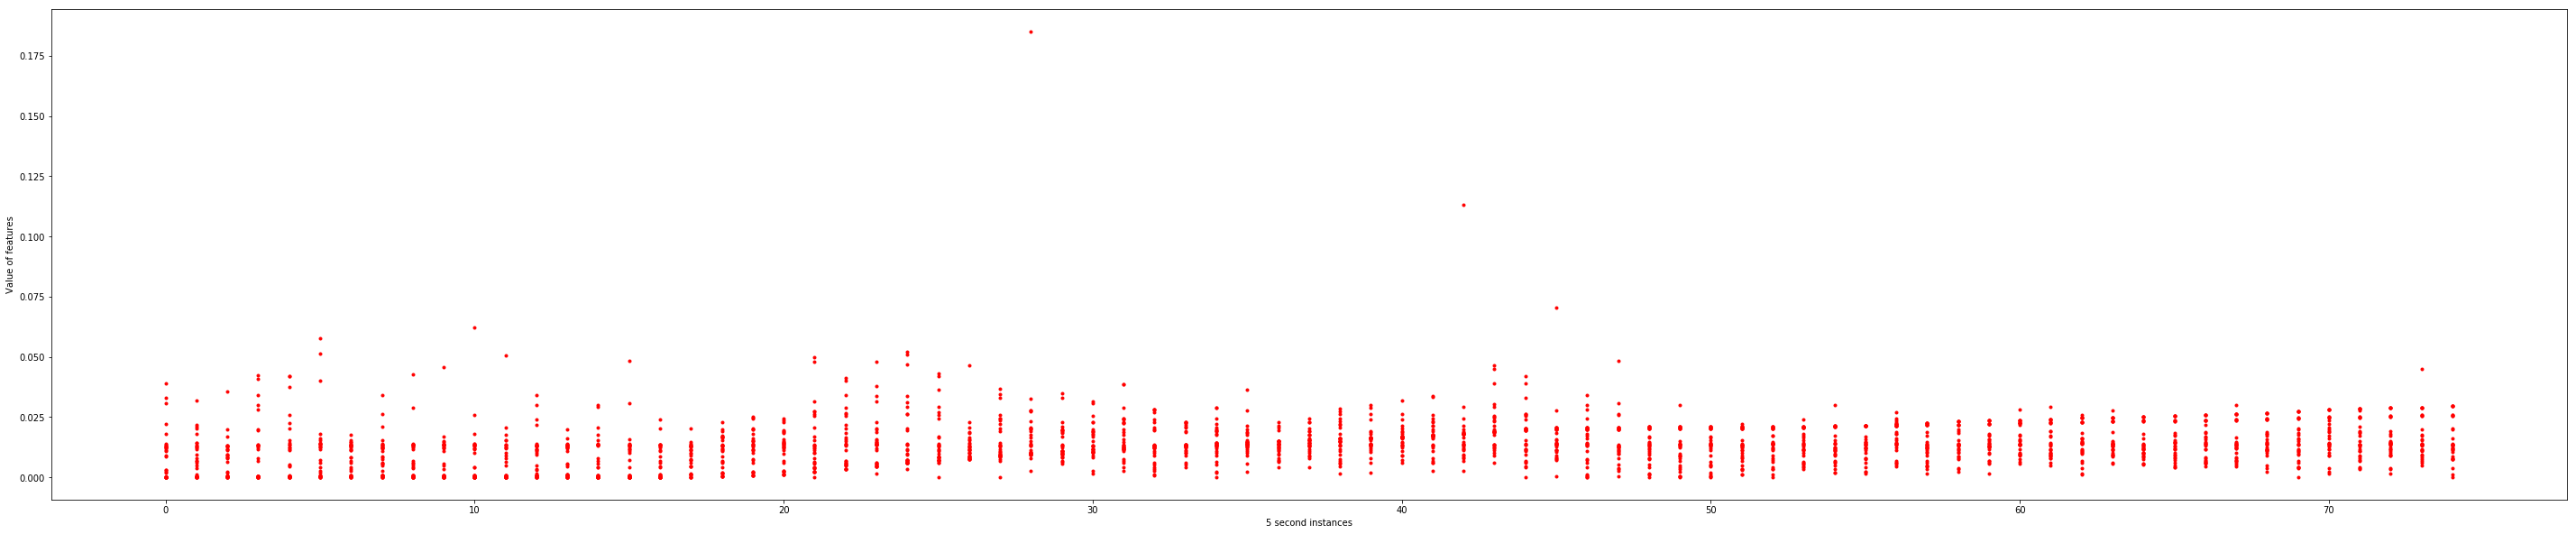

(31, 75)


In [18]:
rcParams['figure.figsize'] = 50,10
norm_matrix = np.moveaxis(norm_matrix, 0, -1)
print(norm_matrix.shape)
import matplotlib.pyplot as plt
plt.plot(norm_matrix,'r.')
plt.xlabel("5 second instances")
plt.ylabel("Value of features")#HERE ALTHOUGH TOTAL = 1 but normal values are between 0 and 0.05
plt.show()
norm_matrix = np.moveaxis(norm_matrix, 0, -1)
print(norm_matrix.shape)

(31, 75)


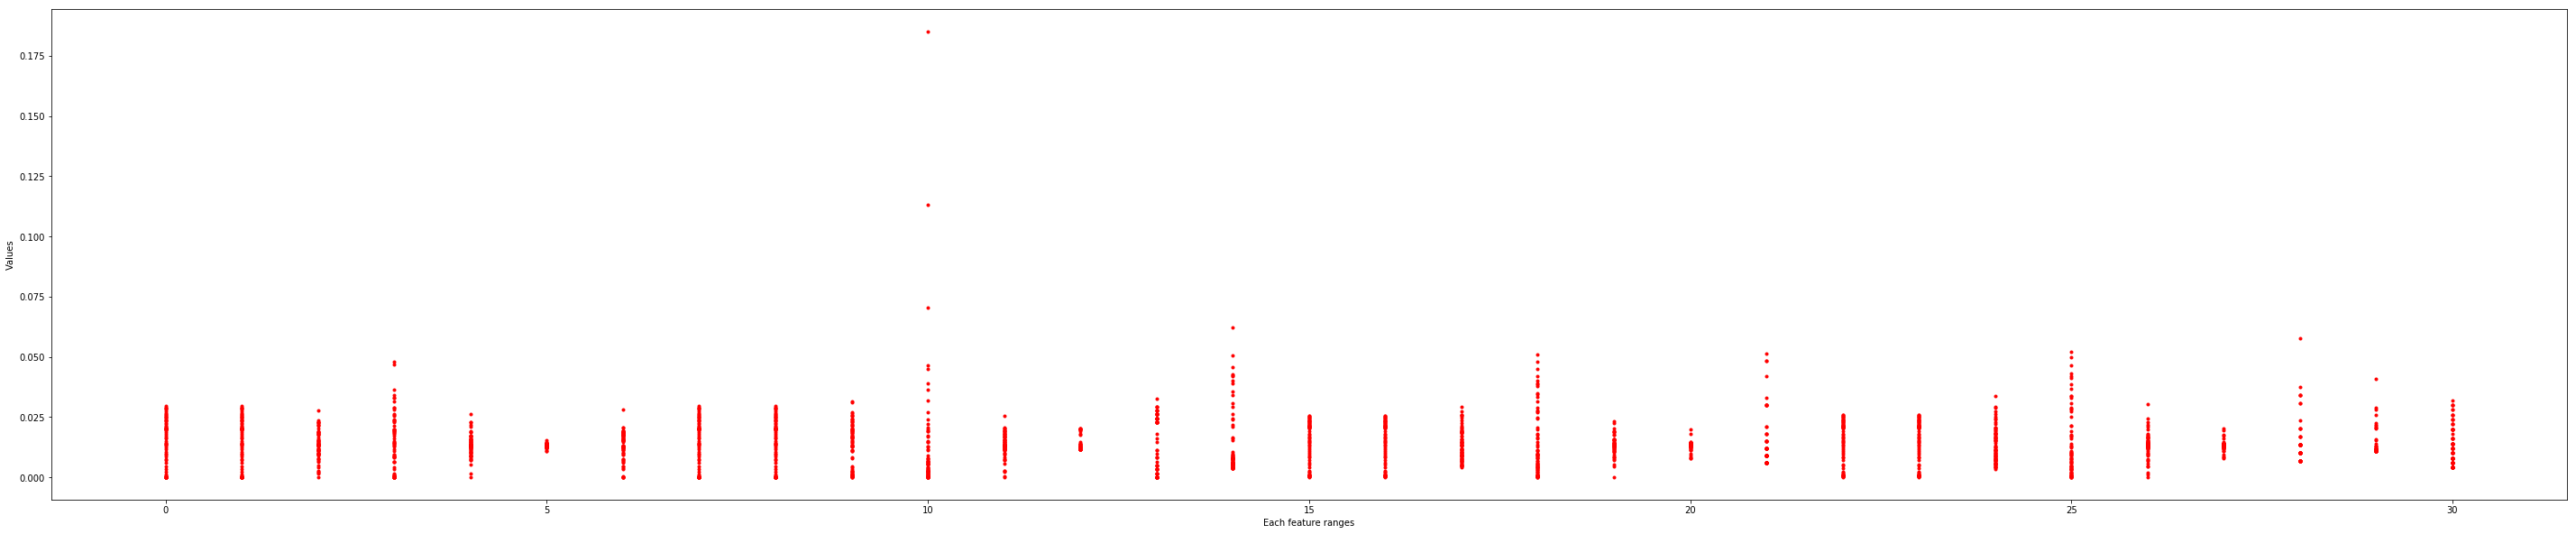

(31, 75)


In [19]:
rcParams['figure.figsize'] = 50,10
#norm_matrix = np.moveaxis(norm_matrix, 0, -1)
print(norm_matrix.shape)
import matplotlib.pyplot as plt
plt.plot(norm_matrix,'r.')
plt.xlabel("Each feature ranges")
plt.ylabel("Values")#HERE ALTHOUGH TOTAL = 1 but normal values are between 0 and 0.05
plt.show()
#norm_matrix = np.moveaxis(norm_matrix, 0, -1)
print(norm_matrix.shape)

In [20]:
norm_matrix = np.moveaxis(norm_matrix, 0, -1)
print(norm_matrix.shape)

(75, 31)


# Choosing optimum values for DBSCAN https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289

In [21]:
#JUST FOR PUTTING THE RANGE OF NUMBERS
def seq(start, stop, step=1):
    n = int(round((stop - start)/float(step)))
    if n > 1:
        return([start + step*i for i in range(n+1)])
    elif n == 1:
        return([start])
    else:
        return([])

In [22]:
#USING KMEANS TO SEE minimum number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

def optimal_cluster_value(norm_matrix):
    min_value=-999.99
    range_n_clusters = seq(2,norm_matrix.shape[0]-1,1)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters,random_state=10)
        cluster_labels = clusterer.fit_predict(norm_matrix)

        silhouette_avg = silhouette_score(norm_matrix,cluster_labels)
        #print("For n clusters = ",n_clusters)
        #print("The avg silhoute score is : ",silhouette_avg)
        if min_value<silhouette_avg:
            min_value=silhouette_avg
            value=n_clusters
        #computing the silhoute scores for each sample
        sample_silhoute_values = silhouette_samples(norm_matrix,cluster_labels)
    print("According to KMeans the cluster number is ",str(value))
    return value

def optimal_eps_value(norm_matrix,n_clusters):
    range_eps = seq(0.001, np.amax(norm_matrix), 0.001)
    cash=True
    max_value= 0.0
    for i in range_eps:
        db = DBSCAN(eps=i,min_samples=n_clusters).fit(norm_matrix)
        core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        labels = db.labels_
        #print(set(labels))
        unique, counts = np.unique(labels, return_counts=True)
        try:
            silhouette_avg = silhouette_score(norm_matrix, labels)
            if silhouette_avg > 0:
                if len(unique) > 2:
                    #print("The average silhouette_score is : ",silhouette_avg,"For eps value = "+str(i))
                    #print(dict(zip(unique, counts)))
                    if max_value<silhouette_avg:
                        max_value=silhouette_avg
                        eps_finalVal=i
                    cash= False
        except:
            if cash:
                continue
            else:
                break
    print("The best eps ",eps_finalVal)
    return eps_finalVal

def DB_cluster(norm_matrix,eps_finalVal,cluster_final):
    min_samples= seq(2,norm_matrix.shape[0]-1,1)
    min_samples_finalVal=0
    maxOutliers=999
    for i in min_samples:
        db = DBSCAN(eps=eps_finalVal,min_samples=i).fit(norm_matrix)
        core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_]=True
        count_labels = set([label for label in db.labels_ if label >=0])
        labels=db.labels_
        unique, counts = np.unique(labels, return_counts=True)
        #print(dict(zip(unique, counts)))
        #print("Total no. of clusters are ",str(len(set(count_labels))))
        if len(set(count_labels)) == cluster_final:
            if dict(zip(unique, counts))[-1] < maxOutliers:
                maxOutliers=dict(zip(unique, counts))[-1]
                final_dist=i
    print("SO the final value for clusters is ",final_dist)
    return final_dist

n_clusters = optimal_cluster_value(norm_matrix)
eps_finalVal = optimal_eps_value(norm_matrix,n_clusters)
final_cluster = DB_cluster(norm_matrix,eps_finalVal,n_clusters)

According to KMeans the cluster number is  4
The best eps  0.031
SO the final value for clusters is  2


In [23]:
print(n_clusters)
print(eps_finalVal)
print(final_cluster)

4
0.031
2


In [21]:
#USING KMEANS TO SEE minimum number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels = clusterer.fit_predict(norm_matrix)
    
    silhouette_avg = silhouette_score(norm_matrix,cluster_labels)
    print("For n clusters = ",n_clusters)
    print("The avg silhoute score is : ",silhouette_avg)
    
    sample_silhoute_values = silhouette_samples(norm_matrix,cluster_labels)

For n clusters =  2
The avg silhoute score is :  0.3377418111382194
For n clusters =  3
The avg silhoute score is :  0.36545082414700986
For n clusters =  4
The avg silhoute score is :  0.39351409718150815
For n clusters =  5
The avg silhoute score is :  0.3485489143338306
For n clusters =  6
The avg silhoute score is :  0.3083153088659212
For n clusters =  7
The avg silhoute score is :  0.29813599413371156
For n clusters =  8
The avg silhoute score is :  0.264342638226264
For n clusters =  9
The avg silhoute score is :  0.23944508796391153
For n clusters =  10
The avg silhoute score is :  0.2277825980049136
For n clusters =  11
The avg silhoute score is :  0.22441282993260317
For n clusters =  12
The avg silhoute score is :  0.21276896271899046
For n clusters =  13
The avg silhoute score is :  0.19175744918546098
For n clusters =  14
The avg silhoute score is :  0.18396344226792175
For n clusters =  15
The avg silhoute score is :  0.17833764637665814
For n clusters =  16
The avg silho

In [48]:
np.amax(norm_matrix)

0.1851184970557431

In [35]:
#PERFECT VALUE FOR EPS DISTANCE
range_eps = seq(0.001, np.amax(norm_matrix), 0.001)
cash=True
max_value= 0.0
for i in range_eps:
    #print("eps value is "+str(i))
    db = DBSCAN(eps=i,min_samples=4).fit(norm_matrix)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels = db.labels_
    #print(set(labels))
    unique, counts = np.unique(labels, return_counts=True)
    try:
        silhouette_avg = silhouette_score(norm_matrix, labels)
        if silhouette_avg > 0:
            if len(unique) > 2:
                print("The average silhouette_score is : ",silhouette_avg,
                      "For eps value = "+str(i))
                print(dict(zip(unique, counts)))
                if max_value<silhouette_avg:
                    max_value=silhouette_avg
                    eps_finalVal=i
                cash= False
                print("*****************")
    except:
        if cash:
            continue
        else:
            break
print("The best val ",eps_finalVal)

The average silhouette_score is :  0.05208199736917614 For eps value = 0.02
{-1: 52, 0: 4, 1: 19}
*****************
The average silhouette_score is :  0.07240947874309446 For eps value = 0.021
{-1: 51, 0: 4, 1: 20}
*****************
The average silhouette_score is :  0.07240947874309446 For eps value = 0.022000000000000002
{-1: 51, 0: 4, 1: 20}
*****************
The average silhouette_score is :  0.08664805424513905 For eps value = 0.023
{-1: 50, 0: 4, 1: 21}
*****************
The average silhouette_score is :  0.08857128747352477 For eps value = 0.024
{-1: 46, 0: 4, 1: 4, 2: 21}
*****************
The average silhouette_score is :  0.10385343444710297 For eps value = 0.025
{-1: 44, 0: 6, 1: 2, 2: 23}
*****************
The average silhouette_score is :  0.16593475948864872 For eps value = 0.026000000000000002
{-1: 43, 0: 9, 1: 23}
*****************
The average silhouette_score is :  0.20547577428861297 For eps value = 0.027000000000000003
{-1: 40, 0: 10, 1: 25}
*****************
The ave

In [24]:
min_samples= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
min_samples_finalVal=0
cluster_final= 4
maxOutliers=999
for i in min_samples:
    print("min_samples value is ",str(i))
    db = DBSCAN(eps=0.032,min_samples=i).fit(norm_matrix)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    count_labels = set([label for label in db.labels_ if label >=0])
    print(set(count_labels))
    
    labels=db.labels_
    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))
    print("Total no. of clusters are ",str(len(set(count_labels))))
    
    if len(set(count_labels)) == cluster_final:
        if dict(zip(unique, counts))[-1] < maxOutliers:
            maxOutliers=dict(zip(unique, counts))[-1]
            final_dist=i
    
    print("*****************************")
print("SO the final value is ",final_dist)

min_samples value is  1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
{0: 20, 1: 1, 2: 18, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 26, 13: 1}
Total no. of clusters are  14
*****************************
min_samples value is  2
{0, 1, 2}
{-1: 11, 0: 20, 1: 18, 2: 26}
Total no. of clusters are  3
*****************************
min_samples value is  3
{0, 1, 2}
{-1: 11, 0: 20, 1: 18, 2: 26}
Total no. of clusters are  3
*****************************
min_samples value is  4
{0, 1, 2}
{-1: 11, 0: 20, 1: 18, 2: 26}
Total no. of clusters are  3
*****************************
min_samples value is  5
{0, 1, 2, 3, 4}
{-1: 13, 0: 19, 1: 6, 2: 7, 3: 4, 4: 26}
Total no. of clusters are  5
*****************************
min_samples value is  6
{0, 1, 2, 3}
{-1: 20, 0: 17, 1: 6, 2: 6, 3: 26}
Total no. of clusters are  4
*****************************
min_samples value is  7
{0, 1}
{-1: 34, 0: 15, 1: 26}
Total no. of clusters are  2
*****************************
min_samples value is  8


In [17]:
#clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped
clustering = DBSCAN(eps=0.031,min_samples=4).fit(norm_matrix)
cluster=clustering.labels_
print(len(set(cluster)))
unique, counts = np.unique(cluster, return_counts=True)
dict(zip(unique, counts))

4


{-1: 14, 0: 20, 1: 15, 2: 26}

In [18]:
print(norm_matrix.shape)

(75, 31)


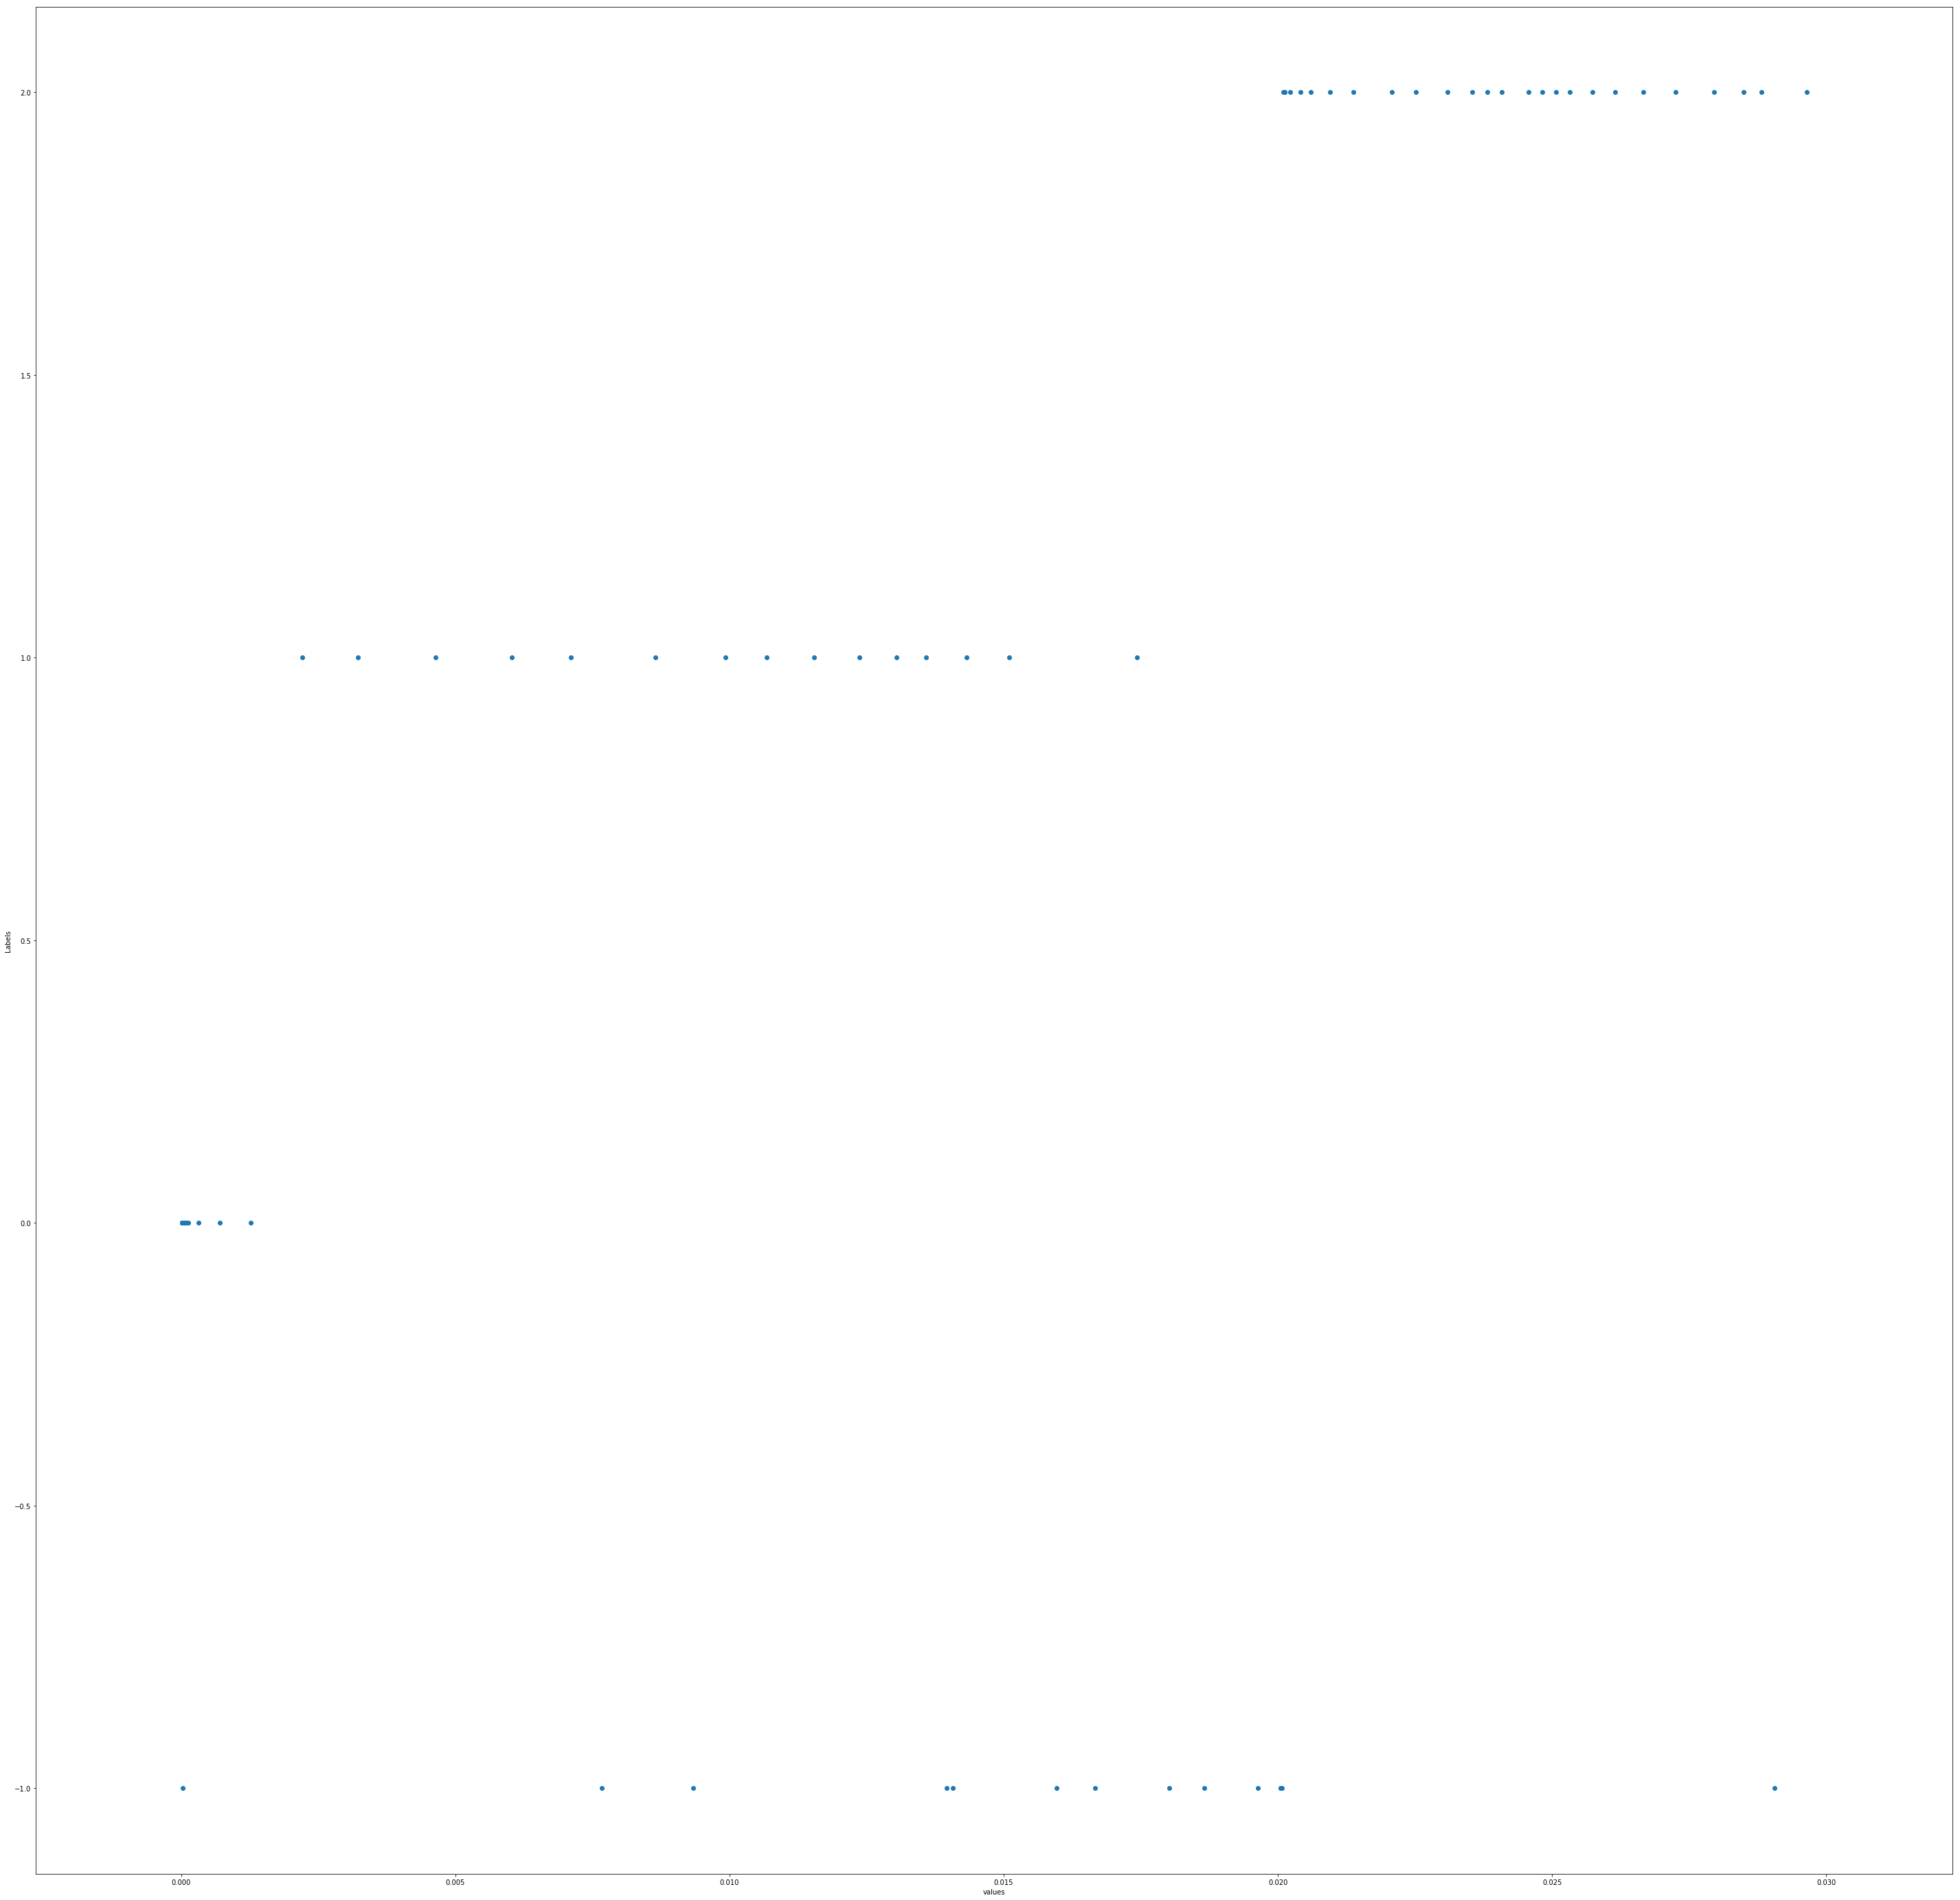

In [28]:
#kon sa feature kis label ko assign hua h
plt.scatter(norm_matrix[:,0],cluster)
plt.xlabel("values")
plt.ylabel("Labels")
plt.show()

In [24]:
"""print(norm_matrix.shape)
norm_matrix = np.moveaxis(norm_matrix, 0, -1)
print(norm_matrix.shape)"""

(31, 75)
(75, 31)


In [29]:
# as PCA maximizes variance so normalization is a must
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
#pca= PCA(n_components=2)
print(norm_matrix.shape)
pca.fit(norm_matrix)#shape (n_samples, n_features)
train_img = pca.transform(norm_matrix)

(75, 31)


In [30]:
print(train_img.shape)
print(pca.components_.shape)

(75, 8)
(8, 31)


In [27]:
# number of components
n_pcs= pca.components_.shape[0]

most_important = [np.abs(pca.components_[:][i]).argmax() for i in range(n_pcs)]
print(most_important)

[10, 10, 10, 21, 30, 14, 30, 13]


In [74]:
n_pcs= pca.components_.shape[0]
print(n_pcs)
print(abs(pca.components_))

8
[[1.93510295e-01 1.93510295e-01 1.15180141e-02 2.59972411e-01
  1.97005131e-03 4.36205222e-03 1.38106377e-01 1.93511001e-01
  1.93511001e-01 2.19143764e-01 4.64919761e-01 2.43536089e-02
  5.04194608e-03 2.04125512e-01 3.25341182e-01 1.82348347e-01
  1.82348347e-01 1.27982020e-01 2.54508729e-01 1.39263477e-03
  1.75874059e-02 1.70819396e-01 1.83172434e-01 1.83172434e-01
  1.39449834e-01 2.57490856e-01 5.91857487e-04 1.37600764e-03
  1.13431430e-01 8.68613787e-02 2.60874056e-02]
 [2.78789565e-01 2.78789565e-01 2.34021732e-02 1.08831427e-01
  3.76799473e-05 4.14709883e-03 2.11422884e-02 2.78777053e-01
  2.78777053e-01 2.34191656e-02 4.61080805e-01 2.73077735e-02
  3.04005457e-02 2.09465230e-01 1.35411911e-01 2.43769767e-01
  2.43769767e-01 9.31870981e-02 2.58119549e-01 2.85066727e-03
  9.19562317e-03 3.67817639e-02 2.47643941e-01 2.47643941e-01
  7.82215063e-02 2.56636995e-01 1.05409659e-02 2.64056055e-03
  3.73738151e-02 1.40268777e-02 8.53641171e-02]
 [6.13560774e-02 6.13560774e-02 3.

In [75]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[:][i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [76]:
print(df)

     0   1
0  PC1  10
1  PC2  10
2  PC3  10
3  PC4  21
4  PC5  30
5  PC6  14
6  PC7  30
7  PC8  13


In [77]:
print(pd.DataFrame(pca.components_,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))

            0         1         2         3         4         5         6   \
PC-1  0.193510  0.193510  0.011518  0.259972 -0.001970  0.004362  0.138106   
PC-2 -0.278790 -0.278790  0.023402  0.108831  0.000038 -0.004147  0.021142   
PC-3  0.061356  0.061356  0.031874 -0.265033 -0.007230 -0.001289 -0.068698   
PC-4  0.071844  0.071844  0.018490  0.121389 -0.005313 -0.014387  0.061211   
PC-5 -0.000342 -0.000342  0.251014 -0.276143 -0.016173 -0.000881  0.075732   
PC-6  0.076961  0.076961  0.444694 -0.040798 -0.226450  0.000789 -0.194626   
PC-7  0.076013  0.076013 -0.313994  0.063846  0.219868  0.009314 -0.069362   
PC-8  0.031251  0.031251 -0.074687 -0.169991  0.026861 -0.015015 -0.024039   

            7         8         9     ...           21        22        23  \
PC-1  0.193511  0.193511  0.219144    ...    -0.170819  0.183172  0.183172   
PC-2 -0.278777 -0.278777  0.023419    ...     0.036782 -0.247644 -0.247644   
PC-3  0.061345  0.061345 -0.191476    ...     0.134472  0.05223

In [33]:
print(pca.explained_variance_ratio_)

[0.38055375 0.25970131 0.19123312 0.04184005 0.02370403 0.02124327
 0.01994124 0.0139344 ]


In [79]:
print(pca.components_)

[[ 1.93510295e-01  1.93510295e-01  1.15180141e-02  2.59972411e-01
  -1.97005131e-03  4.36205222e-03  1.38106377e-01  1.93511001e-01
   1.93511001e-01  2.19143764e-01  4.64919761e-01 -2.43536089e-02
   5.04194608e-03  2.04125512e-01 -3.25341182e-01  1.82348347e-01
   1.82348347e-01  1.27982020e-01  2.54508729e-01 -1.39263477e-03
   1.75874059e-02 -1.70819396e-01  1.83172434e-01  1.83172434e-01
   1.39449834e-01  2.57490856e-01  5.91857487e-04  1.37600764e-03
  -1.13431430e-01 -8.68613787e-02 -2.60874056e-02]
 [-2.78789565e-01 -2.78789565e-01  2.34021732e-02  1.08831427e-01
   3.76799473e-05 -4.14709883e-03  2.11422884e-02 -2.78777053e-01
  -2.78777053e-01  2.34191656e-02  4.61080805e-01 -2.73077735e-02
   3.04005457e-02  2.09465230e-01  1.35411911e-01 -2.43769767e-01
  -2.43769767e-01  9.31870981e-02  2.58119549e-01  2.85066727e-03
  -9.19562317e-03  3.67817639e-02 -2.47643941e-01 -2.47643941e-01
   7.82215063e-02  2.56636995e-01  1.05409659e-02 -2.64056055e-03
   3.73738151e-02  1.4026

(75, 8)


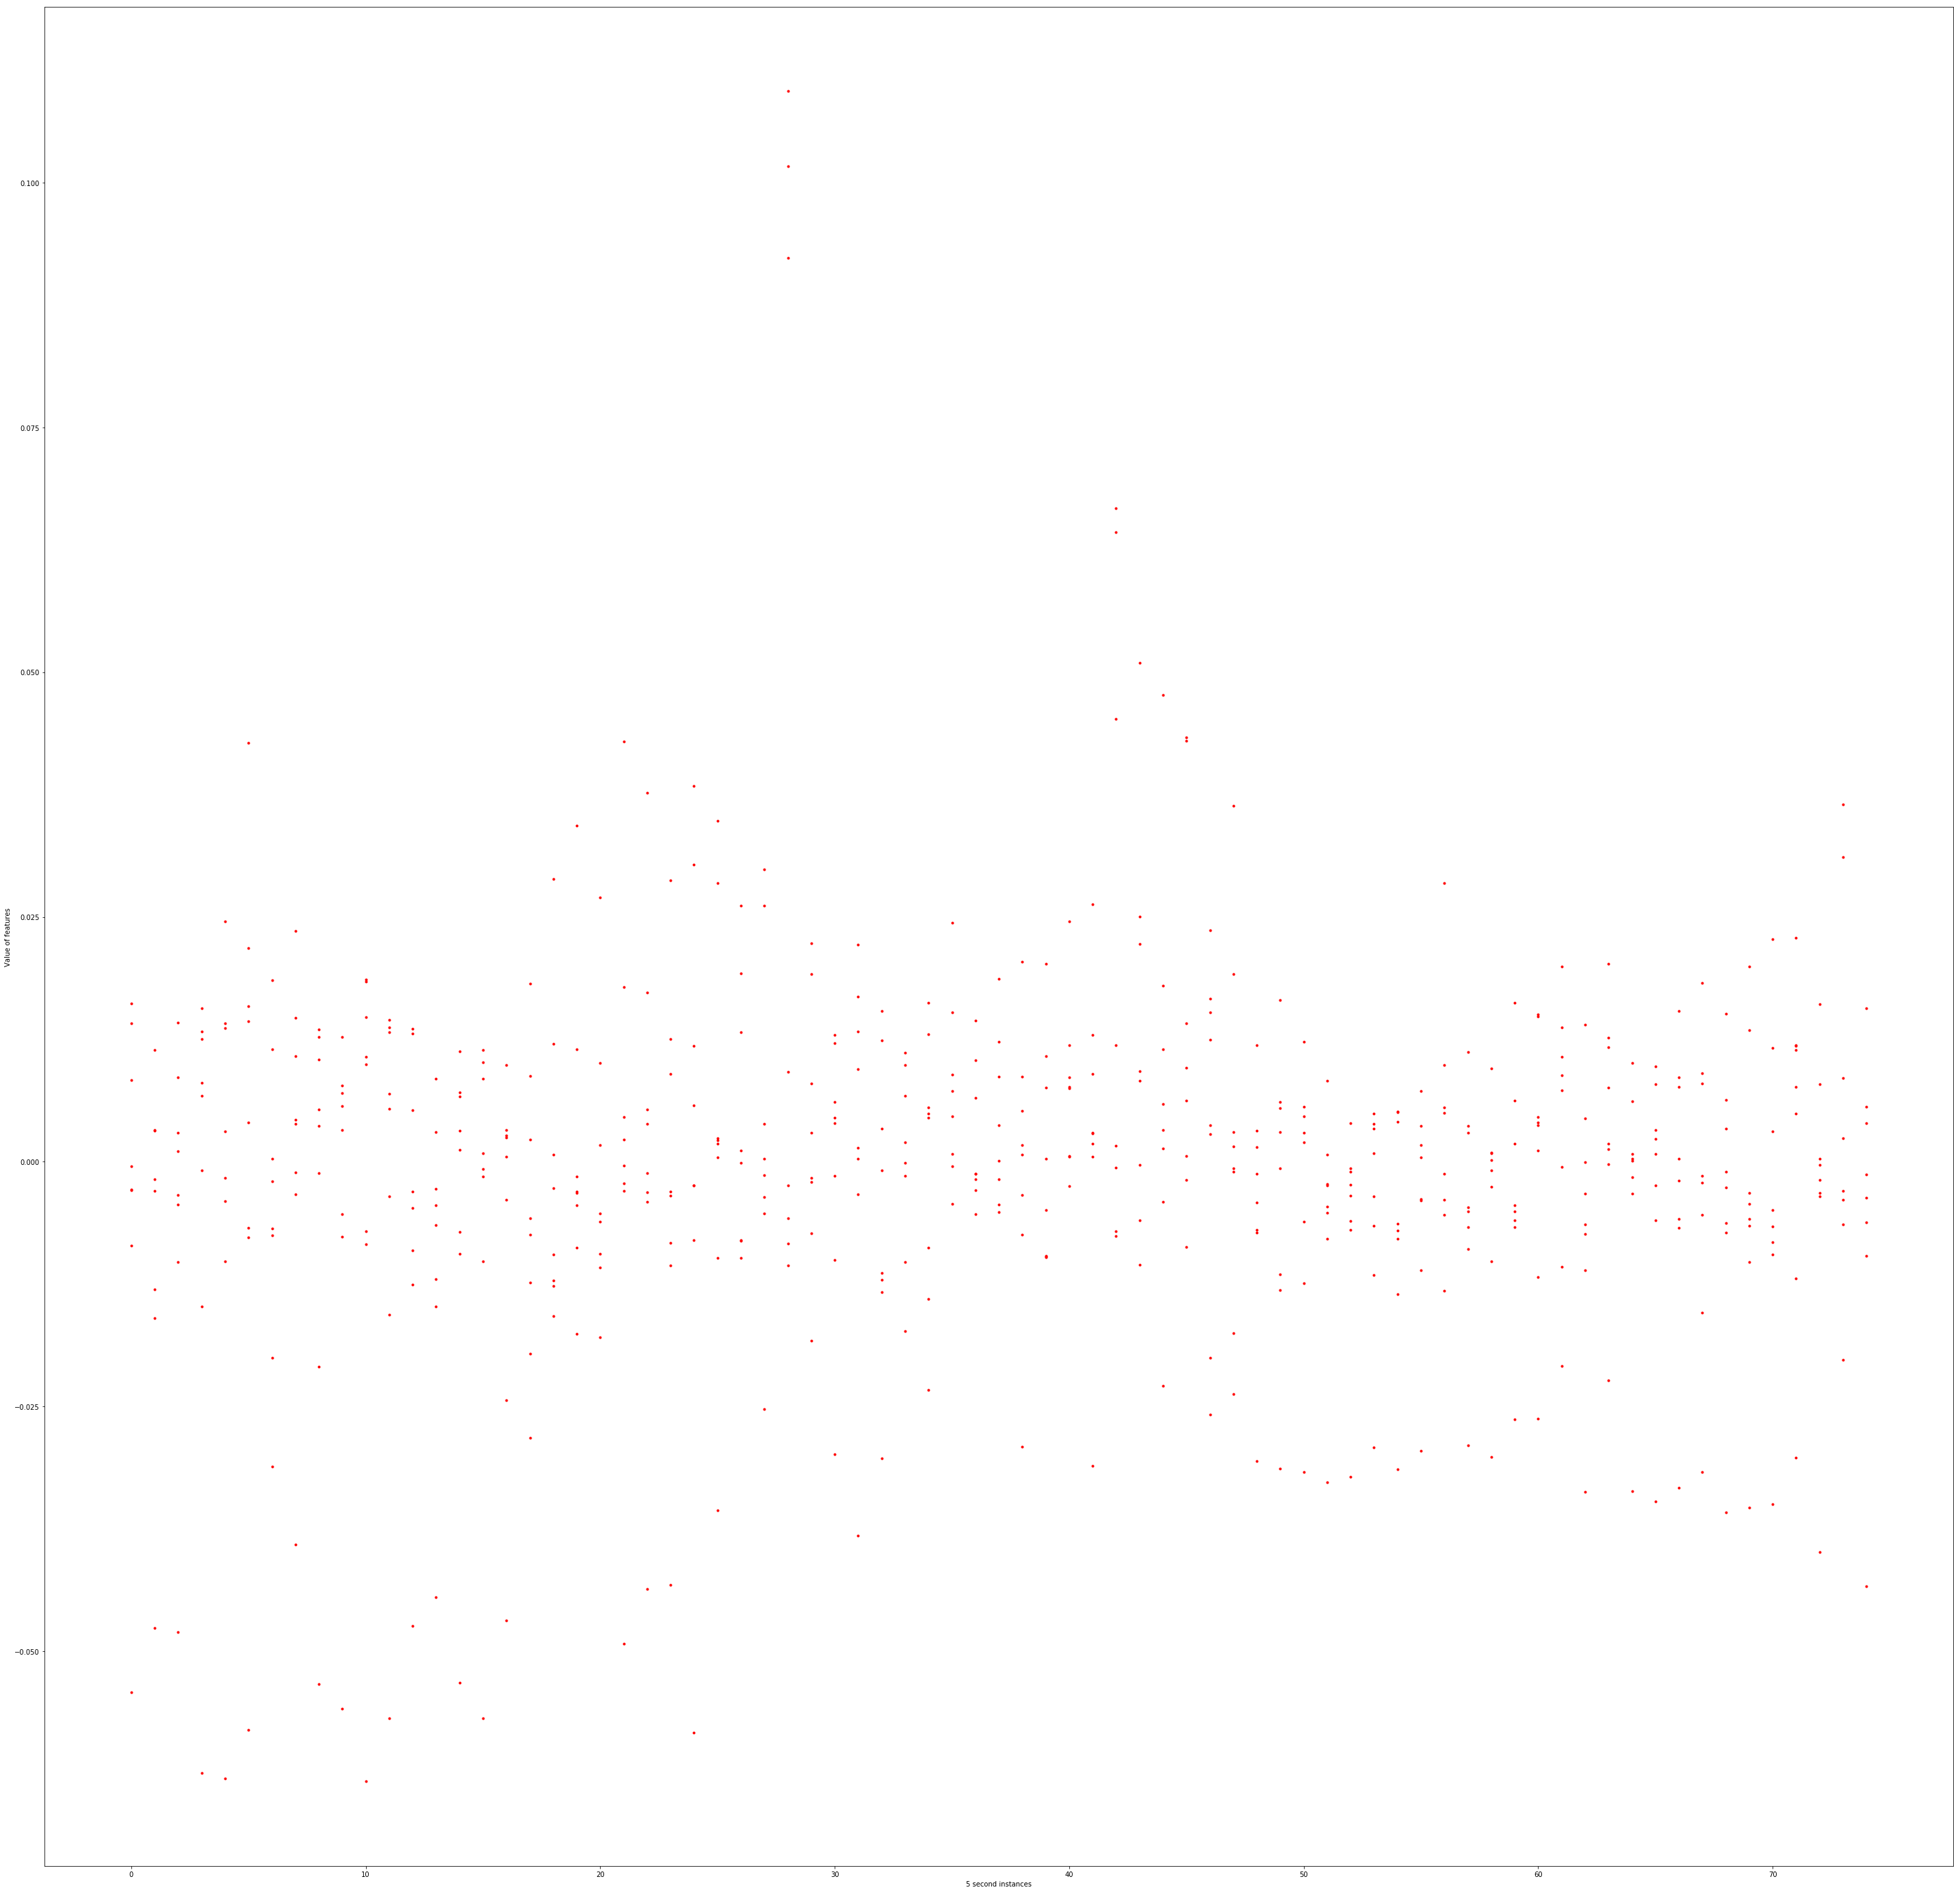

In [87]:
print(train_img.shape)
plt.plot(train_img,'r.')
plt.xlabel("5 second instances")
plt.ylabel("Value of features")
plt.show()

In [31]:
clustering = DBSCAN(eps=0.032,min_samples=5).fit(train_img)
cluster=clustering.labels_
print(len(set(cluster)))
unique, counts = np.unique(cluster, return_counts=True)
dict(zip(unique, counts))

3


{-1: 7, 0: 20, 1: 48}

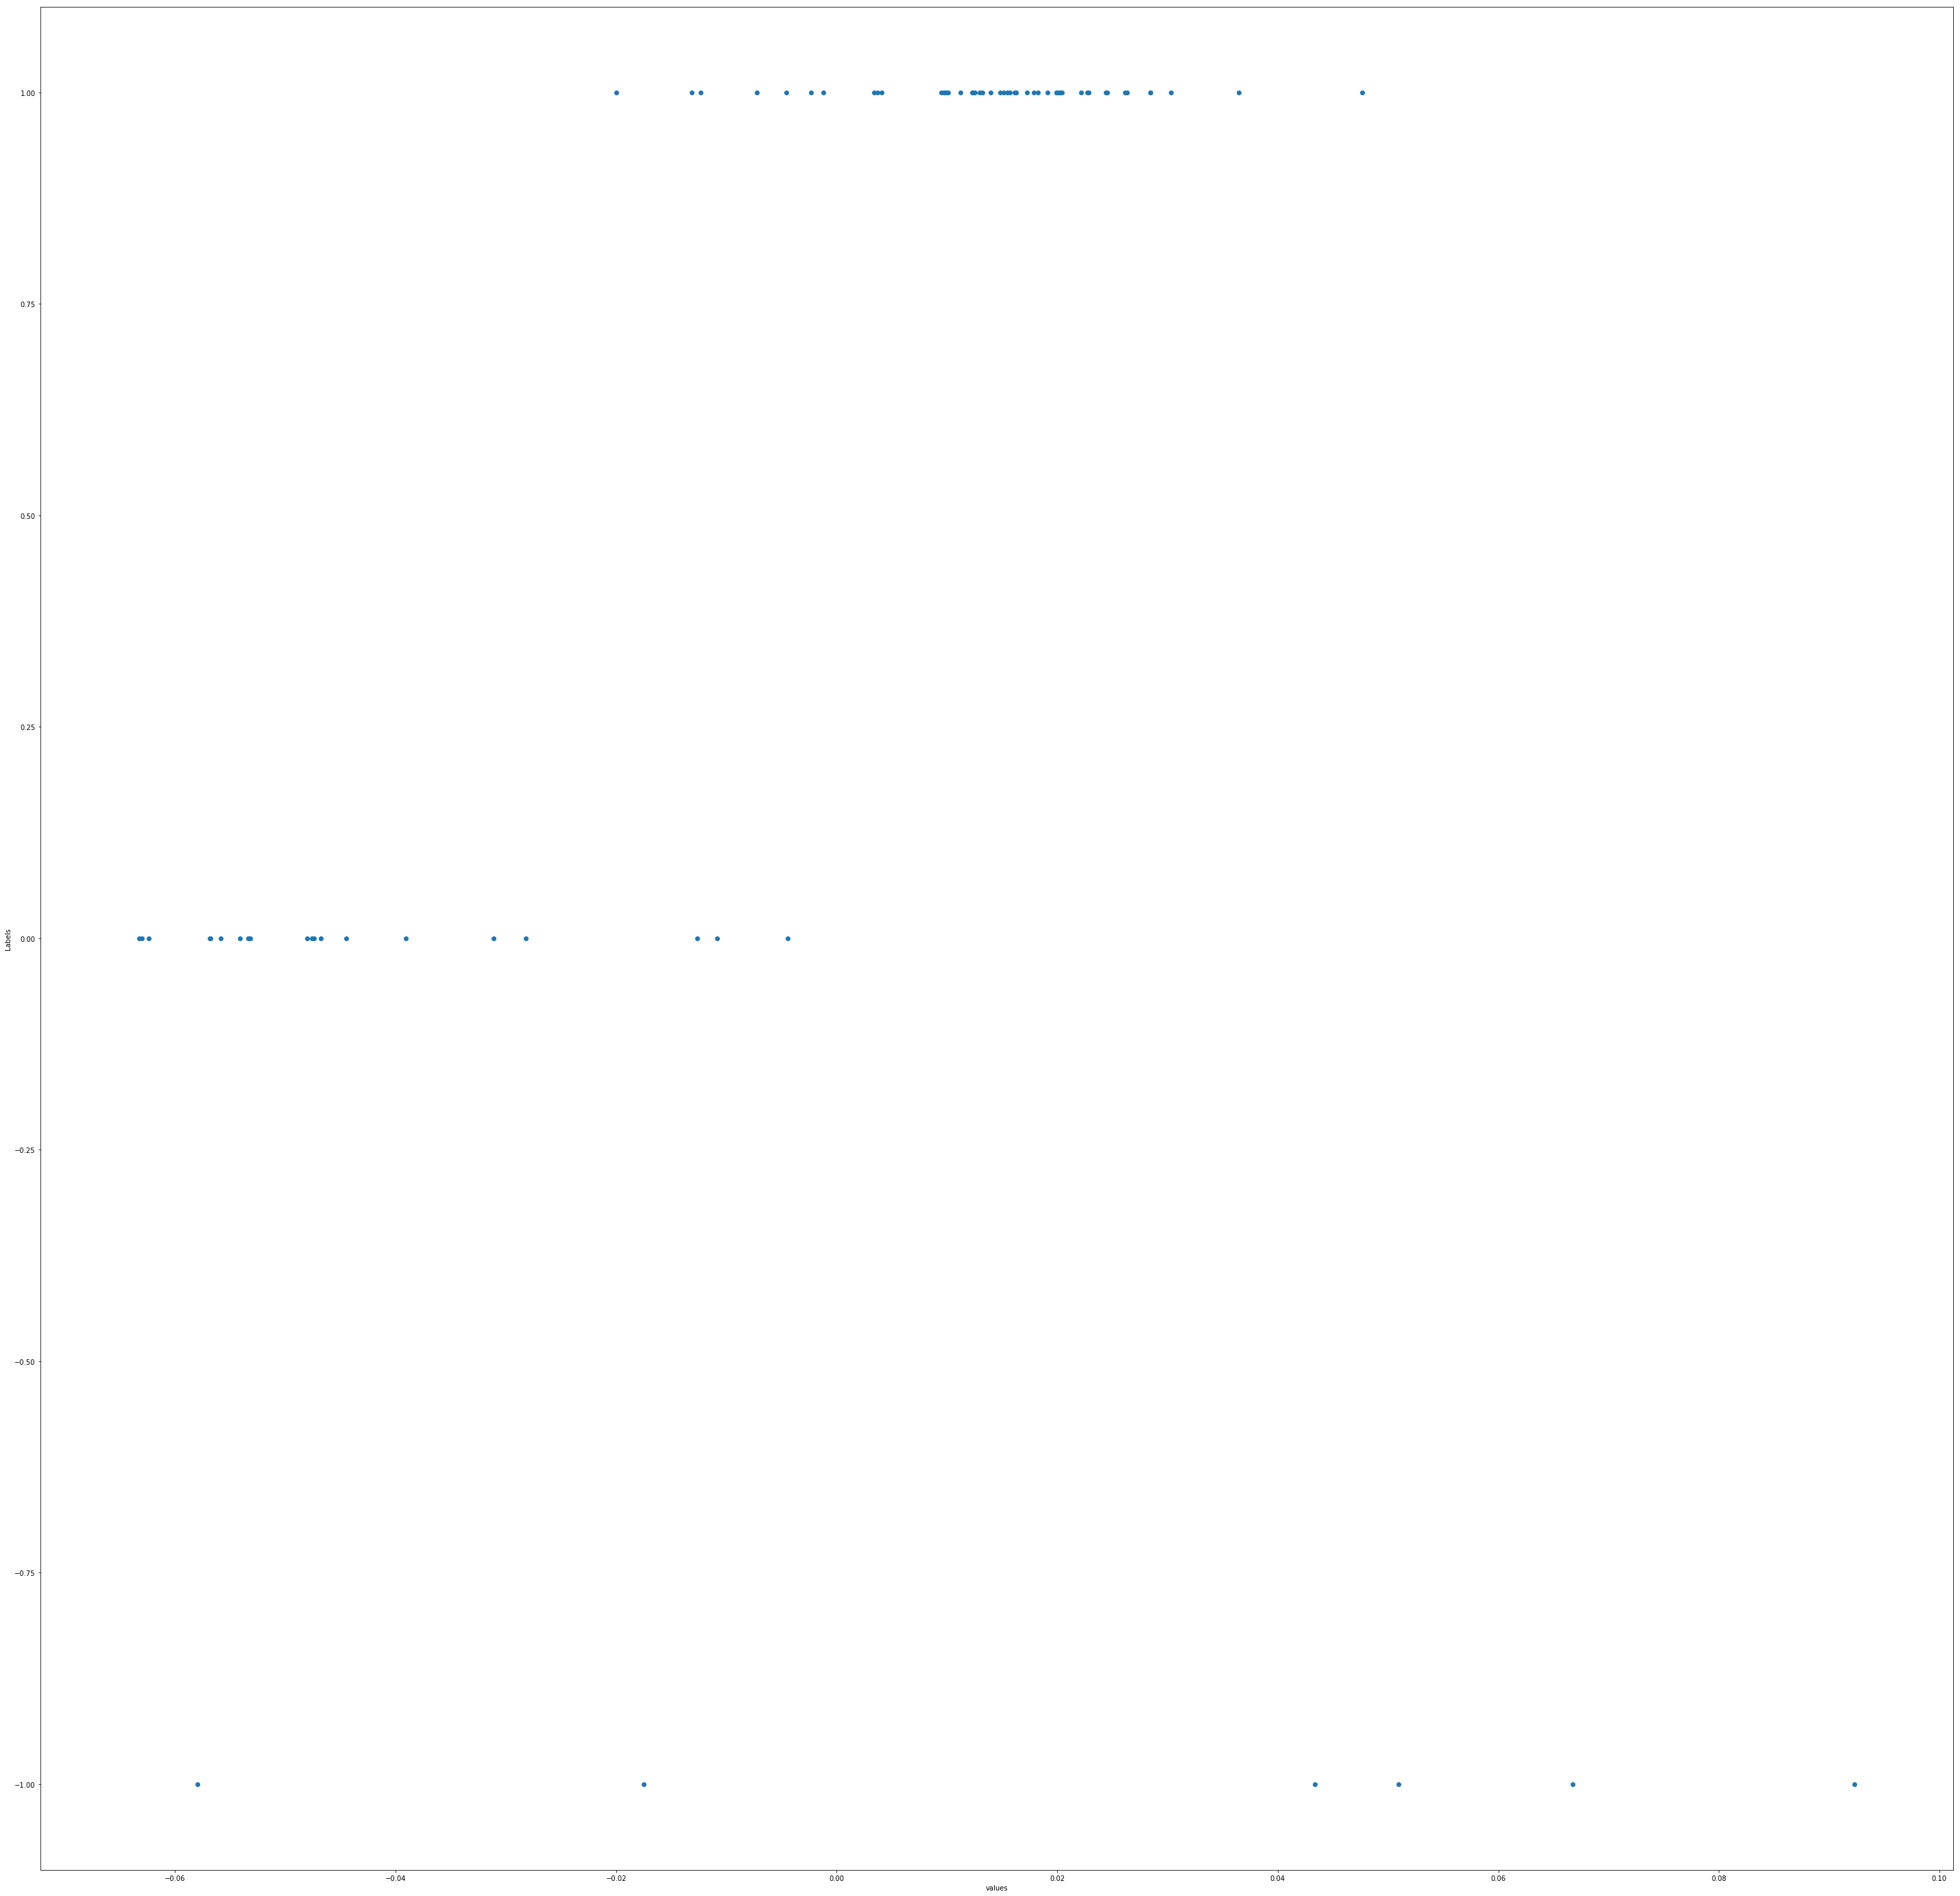

In [82]:
plt.scatter(train_img[:,0],cluster)
plt.xlabel("values")
plt.ylabel("Labels")
plt.show()

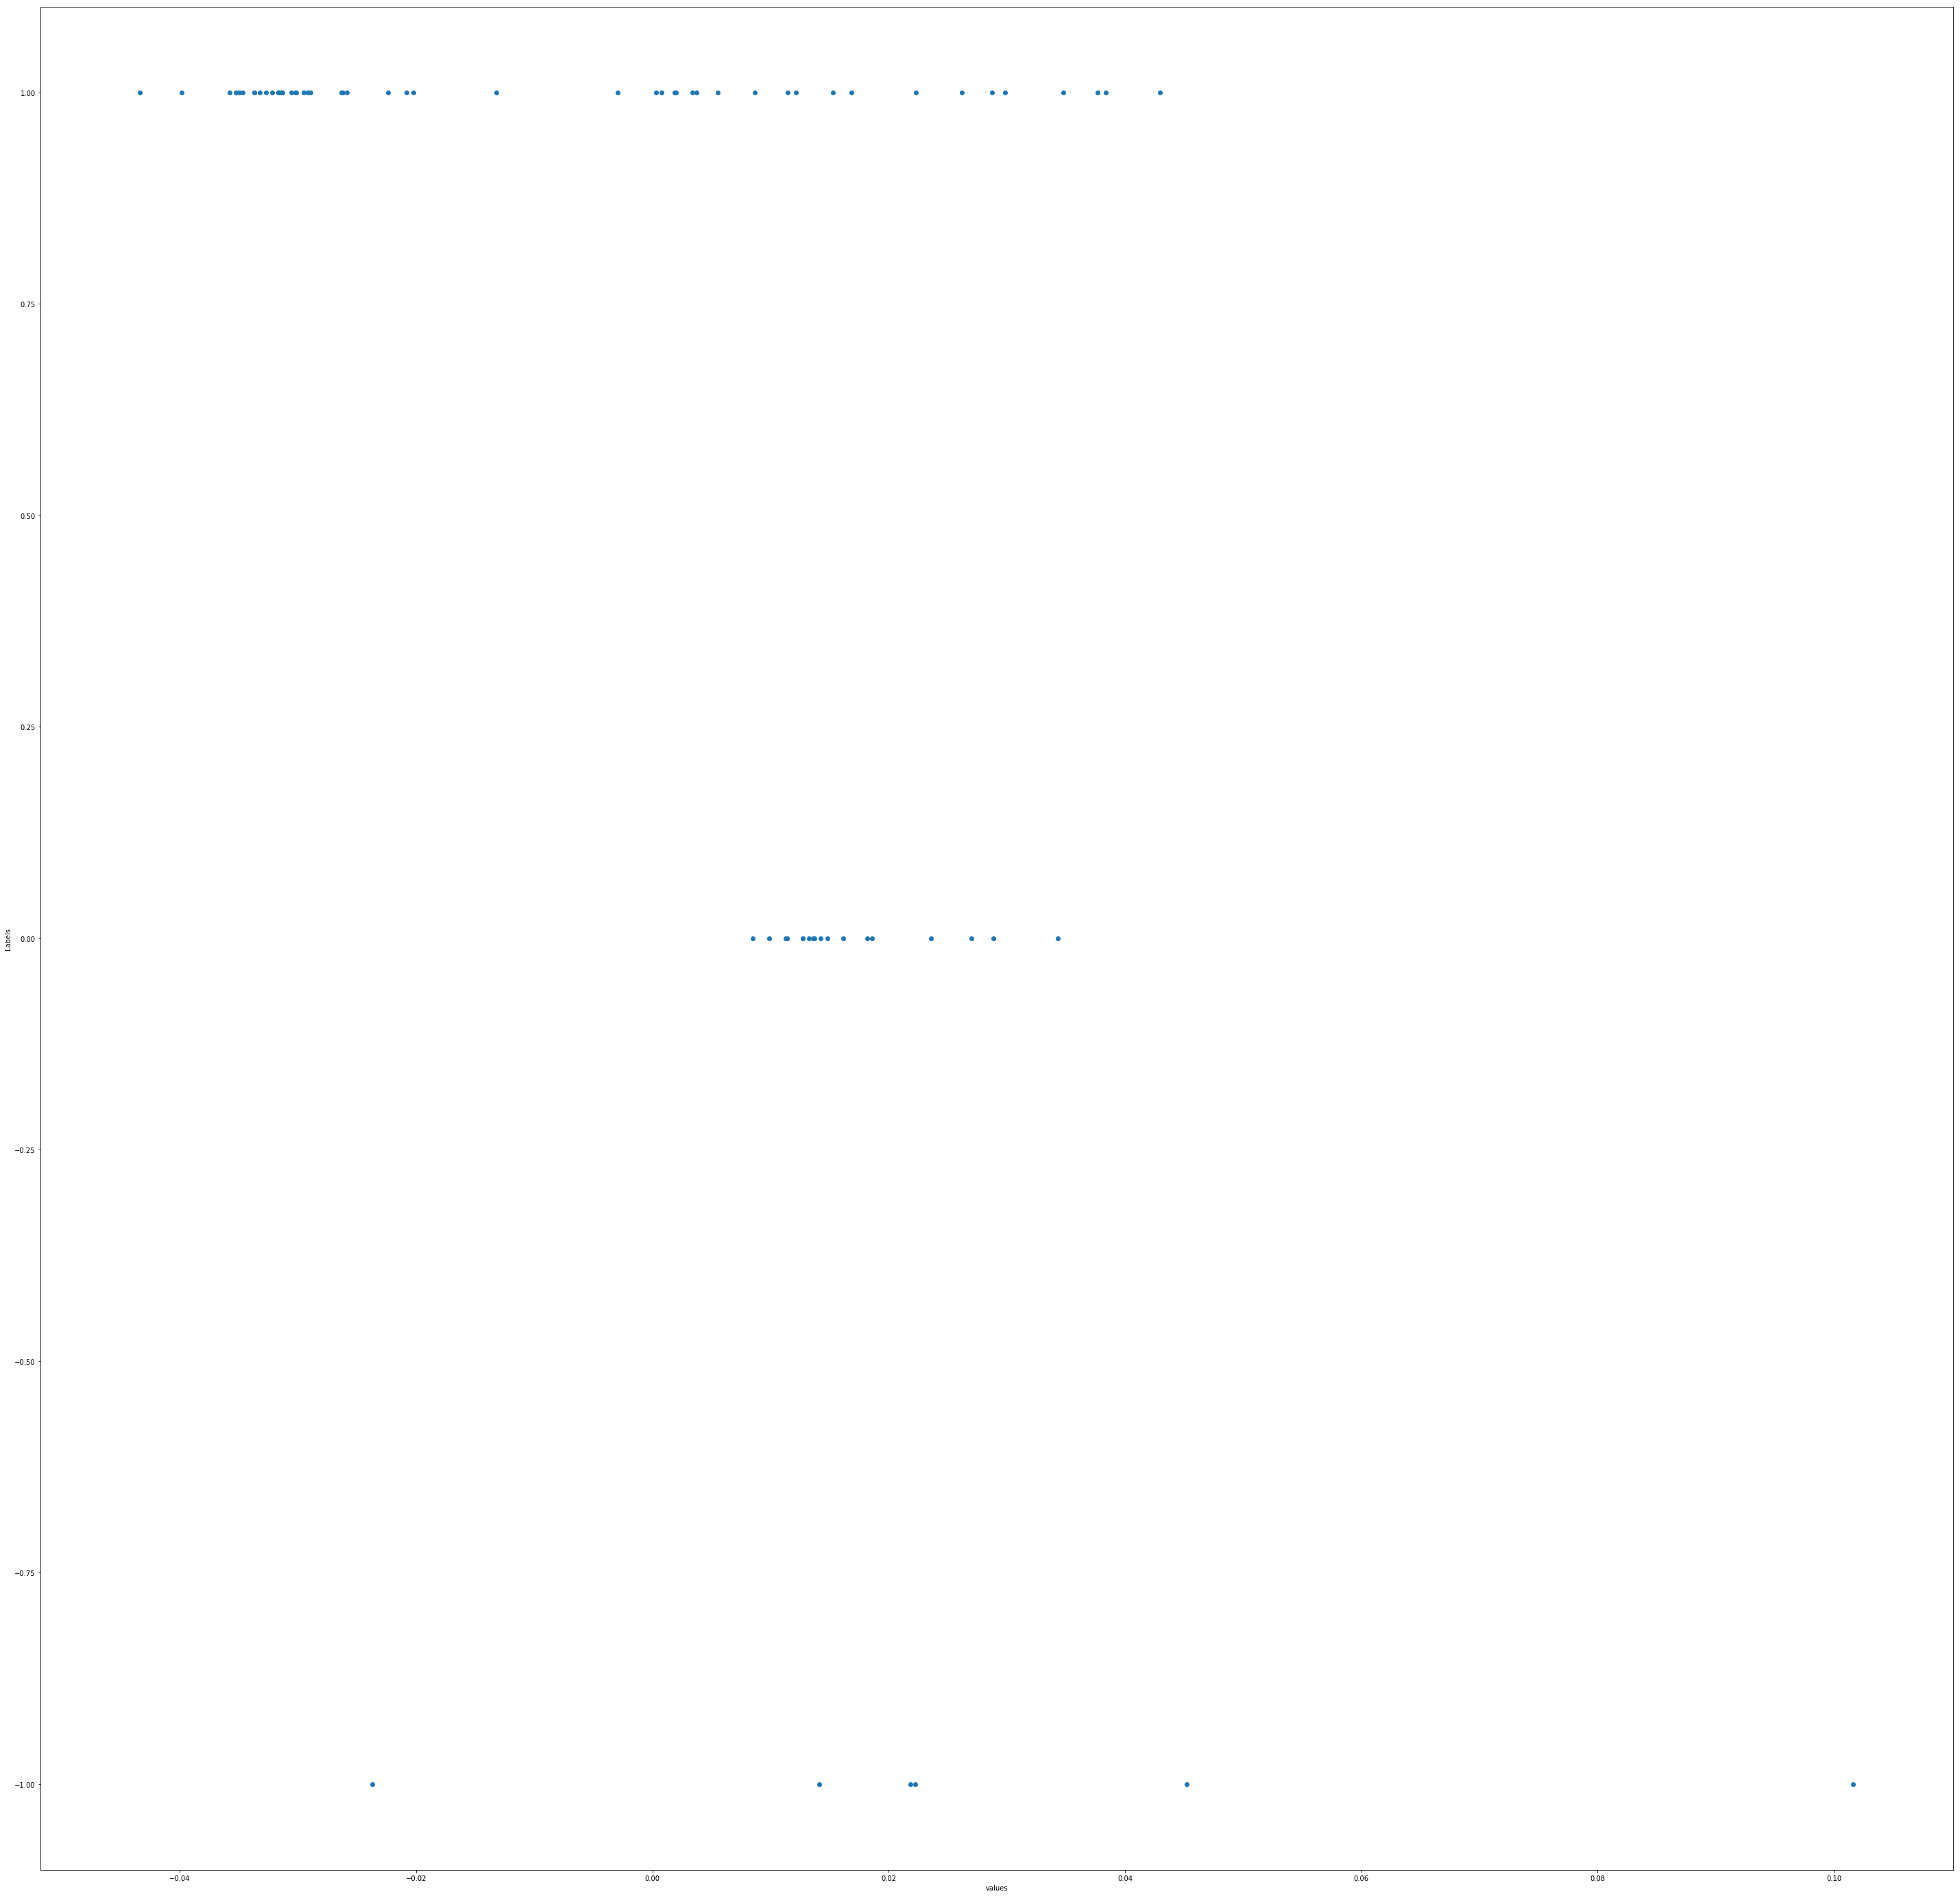

In [83]:
plt.scatter(train_img[:,1],cluster)
plt.xlabel("values")
plt.ylabel("Labels")
plt.show()

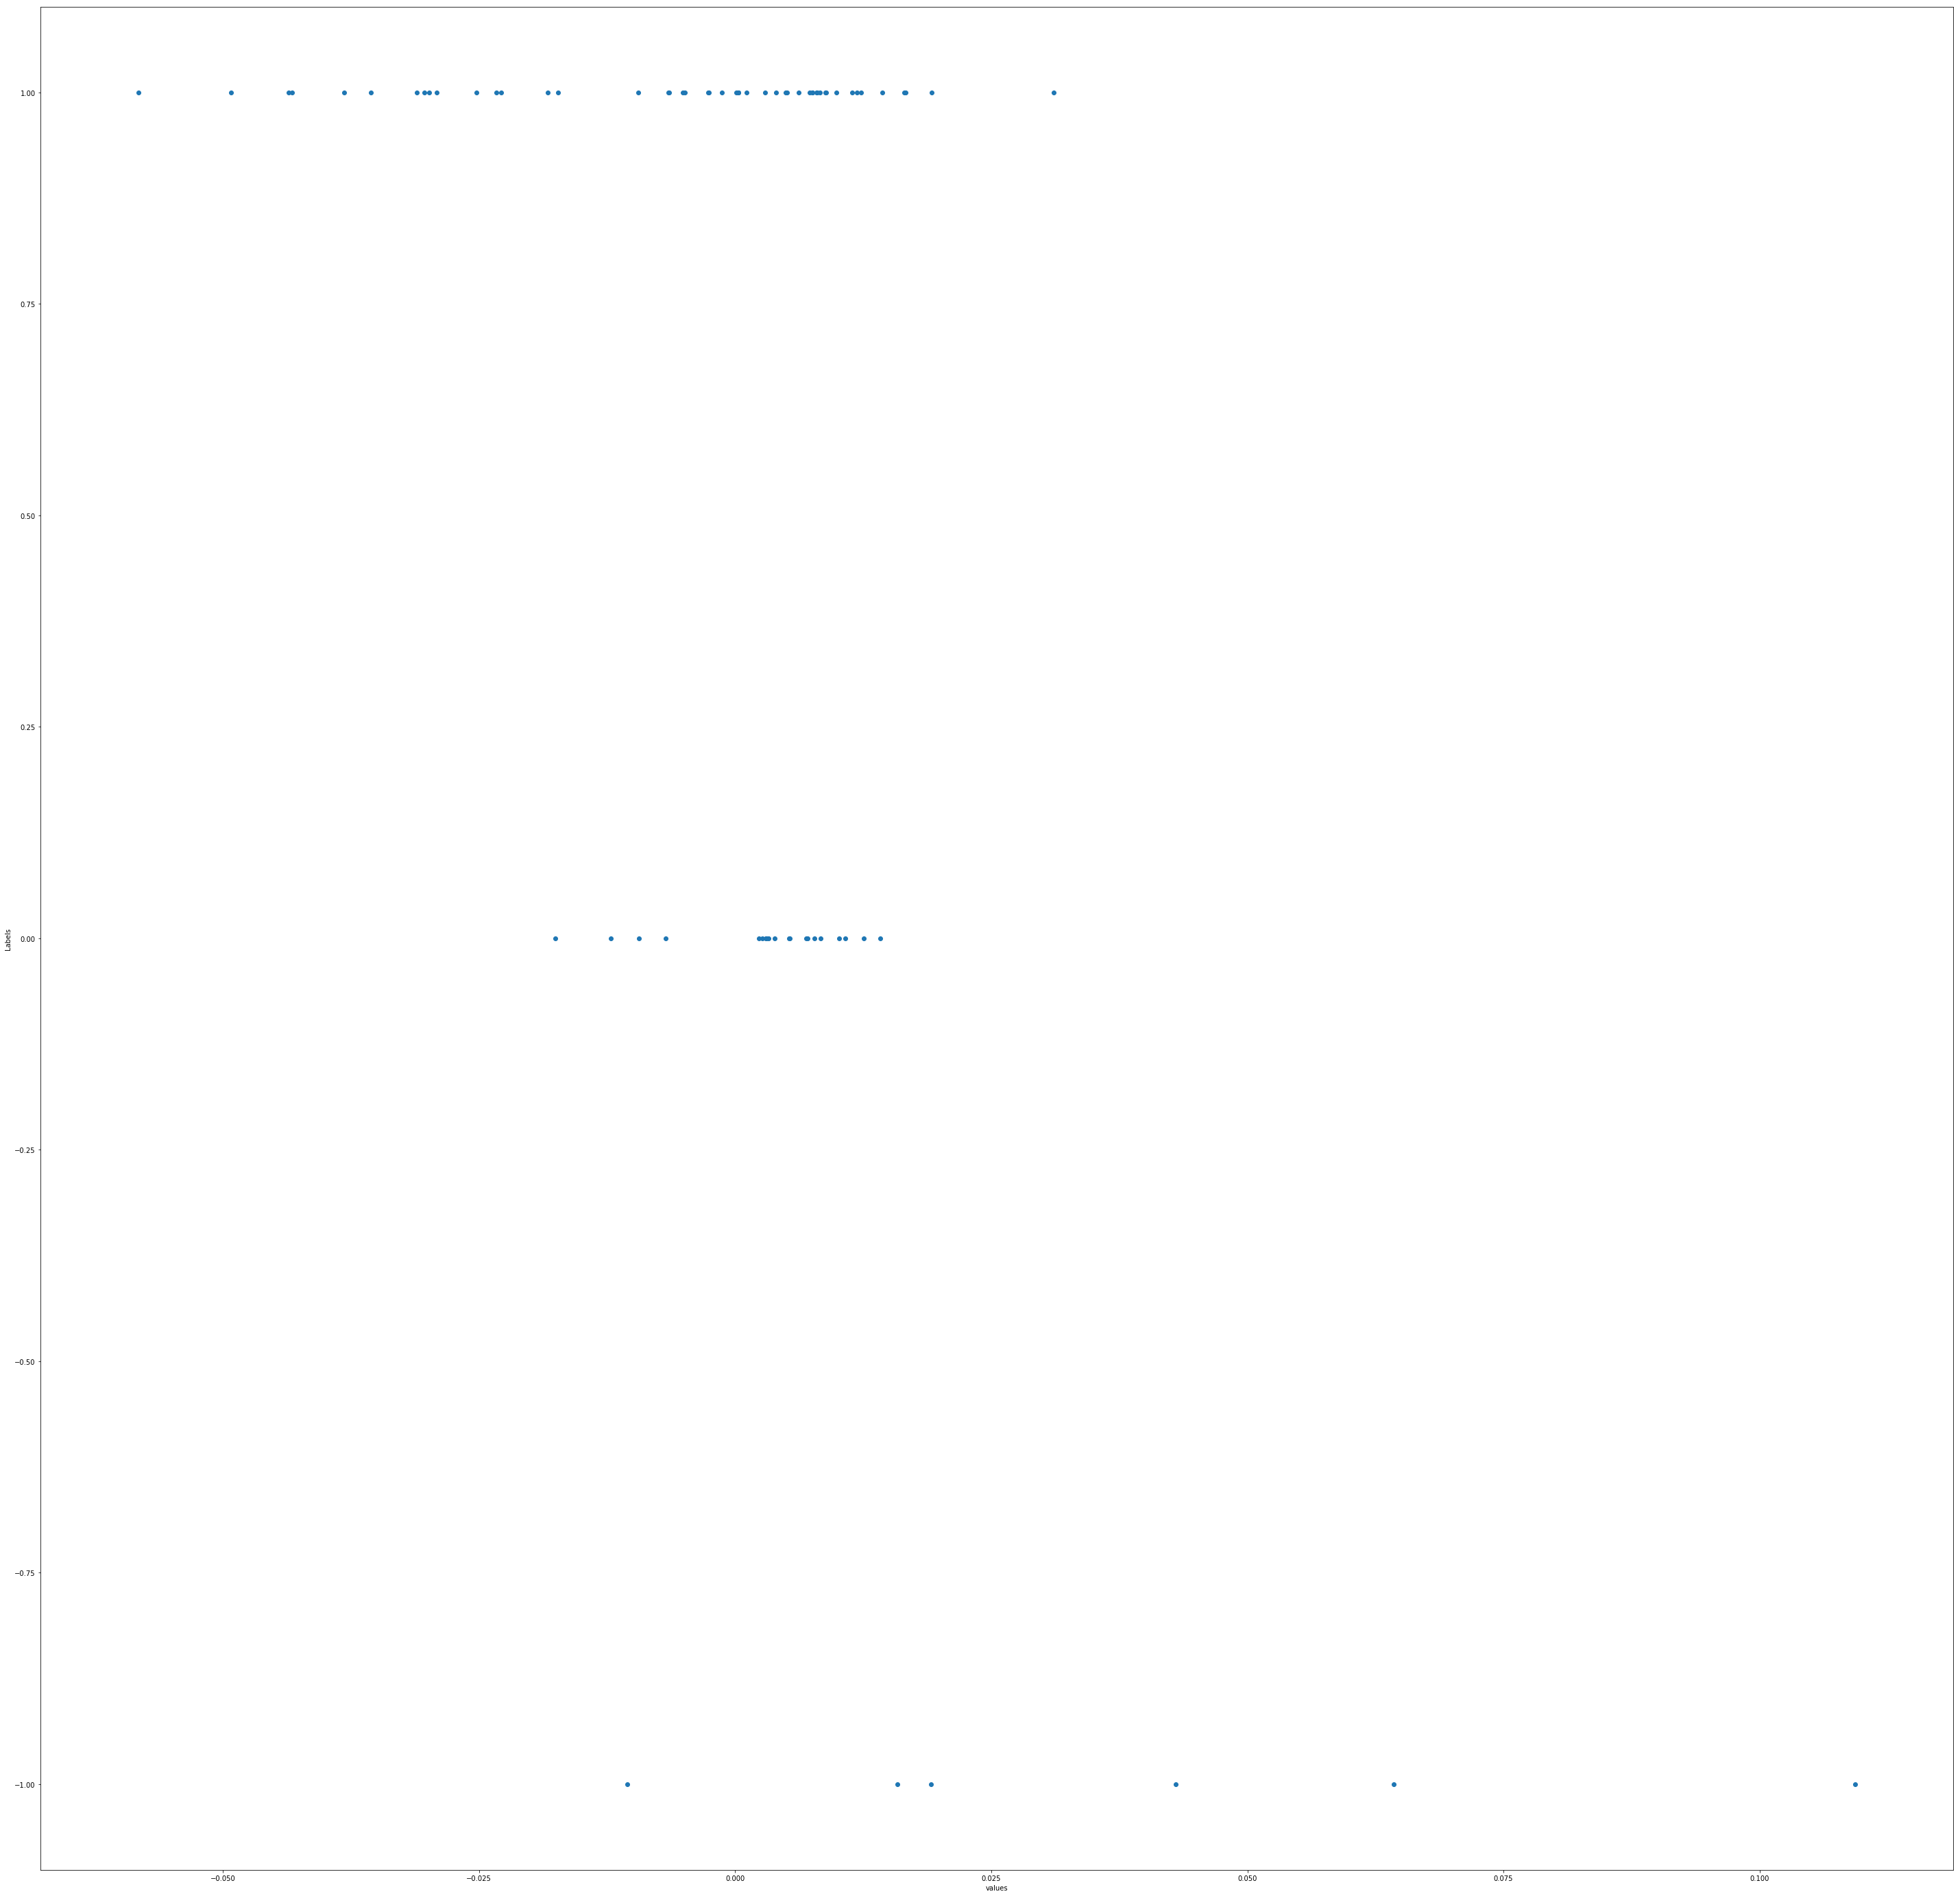

In [84]:
plt.scatter(train_img[:,2],cluster)
plt.xlabel("values")
plt.ylabel("Labels")
plt.show()

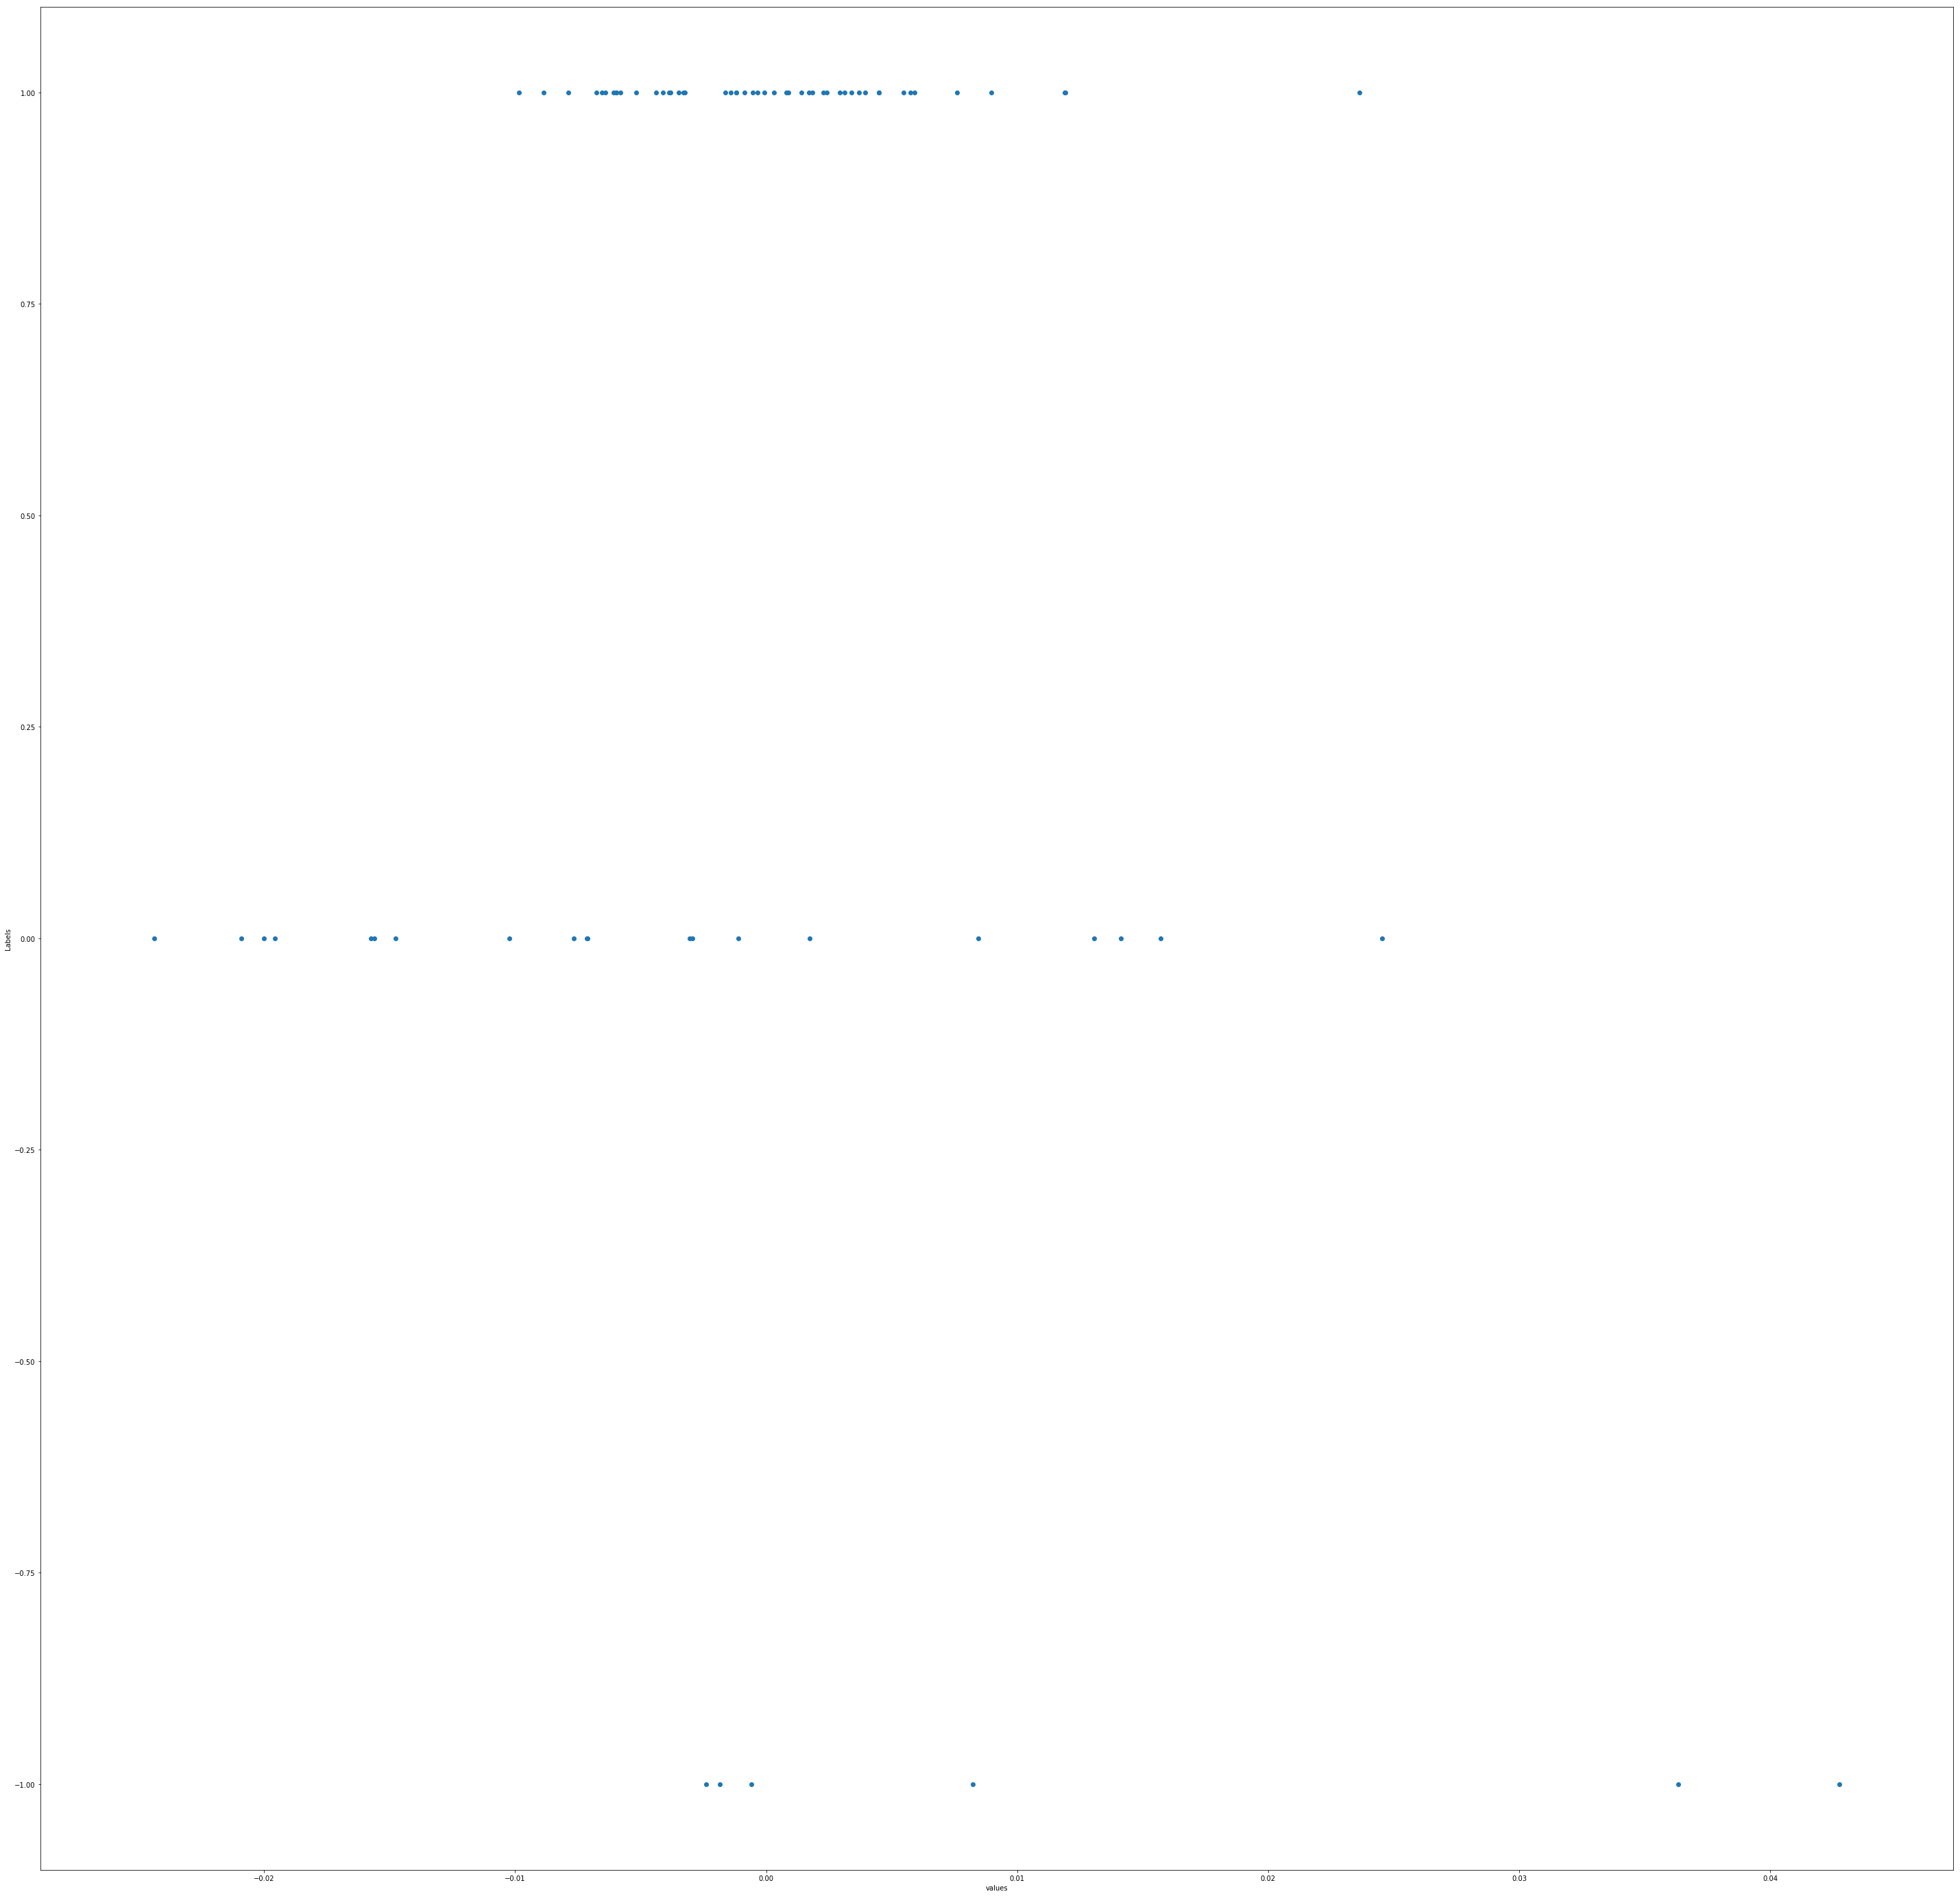

In [85]:
plt.scatter(train_img[:,3],cluster)
plt.xlabel("values")
plt.ylabel("Labels")
plt.show()

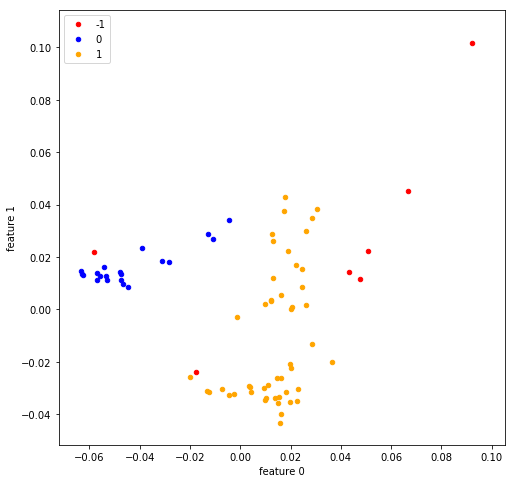

In [32]:
import pandas as pd
def show_clusters(X,cluster):
    df=pd.DataFrame(dict(x=X[:,0],y=X[:,1], label=cluster))
    colors = {-1:'red',0:'blue',1:'orange',2:'green',3:'skyblue',4:'black'}
    fig,ax=plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter',x='x',y='y',label=key ,color=colors[key])
    plt.xlabel("feature 0")
    plt.ylabel("feature 1")
    plt.show()
show_clusters(train_img,cluster)

# for correlation EMG

In [2]:
emg_withoutEnv = np.load("emg_withoutEnvelope.npy")
print(emg_withoutEnv.shape)
print(len(emg_withoutEnv[0][0][0]))

(10, 3, 7)
75


In [3]:
import seaborn.apionly as sns
variable = emg_withoutEnv[0][0]

D:\Anaconda3\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [7]:
chek = np.zeros(shape=((variable.shape[0]),len(variable[0])))
print(chek.shape)
for i,data in enumerate(variable):
    chek[i]=np.array(data)
"""chek = np.moveaxis(chek, 0, -1)
print(chek.shape)"""

(7, 75)


'chek = np.moveaxis(chek, 0, -1)\nprint(chek.shape)'

In [8]:
for i in chek:
    for a,j in enumerate(i):
        if int(j) == 0:
            print(j)
            print(a)
    print("HELLLO")

0.00030975259381927446
0
0.0007576411462008325
1
0.0010174600475051638
2
0.0011436543509637021
3
0.001206515404984681
4
0.0013356578024193045
5
0.0020884178051184185
6
0.002443764056626953
7
0.002505016176768604
8
0.002567585339563116
9
0.0025847824914390577
10
0.0026347392801294193
11
0.0030950649968641574
12
0.0031951792620997354
13
0.0032192880635657424
14
0.0032376926848094387
15
0.003264464923717848
16
0.003616359788752522
17
0.005348533803625086
18
0.007888442178753211
19
0.008867994915869853
20
0.014298671589517193
21
0.018770394134949984
22
0.021571832125497042
23
0.02750457730822015
24
0.032121999481538106
25
0.03312693060126869
26
0.0369015513483696
27
0.03981512062673977
28
0.04253695090909123
29
0.0451424982890817
30
0.04891446522799432
31
0.05170074765899754
32
0.05343393501255352
33
0.056341068870279114
34
0.05860672685196586
35
0.05912495721519591
36
0.060839351691385594
37
0.0638569454636833
38
0.0649829376213347
39
0.06696753276013505
40
0.07039837335273187
41
0.072037

          0         1         2         3         4   5         6
0  1.000000  1.000000  0.127124 -0.012981 -0.021650 NaN  0.195533
1  1.000000  1.000000  0.127124 -0.012981 -0.021650 NaN  0.195533
2  0.127124  0.127124  1.000000  0.927262 -0.027544 NaN  0.838859
3 -0.012981 -0.012981  0.927262  1.000000 -0.018795 NaN  0.825483
4 -0.021650 -0.021650 -0.027544 -0.018795  1.000000 NaN  0.084411
5       NaN       NaN       NaN       NaN       NaN NaN       NaN
6  0.195533  0.195533  0.838859  0.825483  0.084411 NaN  1.000000


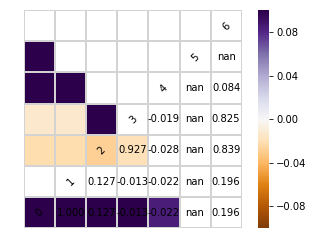

In [5]:
# Using dataset
cols = [s*7 for s in list("ABCDEFG")]
df = pd.DataFrame(chek)#pd.DataFrame(data=np.random.rayleigh(scale=5, size=(100, 4)), columns=cols)

# Compute the correlation matrix
corr = df.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()